# CSE603: Machine Learning - II

# Final - Project

# Analysis of Statistical Inference Methods vs Traditional ML 

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 31st January 2022

# Analysis on Datasets for Regression

# Regression Datset #1

# Importing Libraraies

In [1]:
import pandas as pd
import pymc3 as pm
import numpy as np
import theano.tensor as tt
import matplotlib.pyplot as plt

# %matplotlib inline
import arviz as az
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import graphviz
import os


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:


import lazypredict
from lazypredict.Supervised import LazyRegressor

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosis

from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import mutual_info_regression

from sklearn.decomposition import PCA

import time

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline


import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder

import time


from numpy import mean



from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
import os

import matplotlib
import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import LassoCV
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score




cv = KFold(n_splits=10, random_state=1, shuffle=True)
# reg = LinearRegression()


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


from numpy.random import normal
from numpy.random import exponential
import random
import re

import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_selection import mutual_info_regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


## Getting Dataeset

In [3]:
df=pd.read_csv('AirfoilSelfNoise.csv')
print(df.shape)
df.head()

(1503, 6)


f  alpha    c  U_infinity  delta   SSPL
0   800   0.00 0.30       71.30   0.00 126.20
1  1000   0.00 0.30       71.30   0.00 125.20
2  1250   0.00 0.30       71.30   0.00 125.95
3  1600   0.00 0.30       71.30   0.00 127.59
4  2000   0.00 0.30       71.30   0.00 127.46

In [4]:
df.tail()

f  alpha    c  U_infinity  delta   SSPL
1498  2500  15.60 0.10       39.60   0.05 110.26
1499  3150  15.60 0.10       39.60   0.05 109.25
1500  4000  15.60 0.10       39.60   0.05 106.60
1501  5000  15.60 0.10       39.60   0.05 106.22
1502  6300  15.60 0.10       39.60   0.05 104.20

### Data set details

### Dataset Title: Airfoil Self-Noise Data Set

NASA dataset obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel. The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/airfoil+self-noise

https://www.kaggle.com/datasets/fedesoriano/airfoil-selfnoise-dataset



#### Attribute Information:
Input features:

f: Frequency in Hertzs [Hz].

alpha: Angle of attack (AoA, α), in degrees [°].

c: Chord length, in meters [m].

U_infinity: Free-stream velocity, in meters per second [m/s].

delta: Suction side displacement thickness (𝛿), in meters [m].


Output:

SSPL: Scaled sound pressure level, in decibels [dB].

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   f           1503 non-null   int64  
 1   alpha       1503 non-null   float64
 2   c           1503 non-null   float64
 3   U_infinity  1503 non-null   float64
 4   delta       1503 non-null   float64
 5   SSPL        1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [6]:
df.describe()

f   alpha       c  U_infinity   delta    SSPL
count  1503.00 1503.00 1503.00     1503.00 1503.00 1503.00
mean   2886.38    6.78    0.14       50.86    0.01  124.84
std    3152.57    5.92    0.09       15.57    0.01    6.90
min     200.00    0.00    0.03       31.70    0.00  103.38
25%     800.00    2.00    0.05       39.60    0.00  120.19
50%    1600.00    5.40    0.10       39.60    0.00  125.72
75%    4000.00    9.90    0.23       71.30    0.02  130.00
max   20000.00   22.20    0.30       71.30    0.06  140.99

[None, None, None, None, None, None]

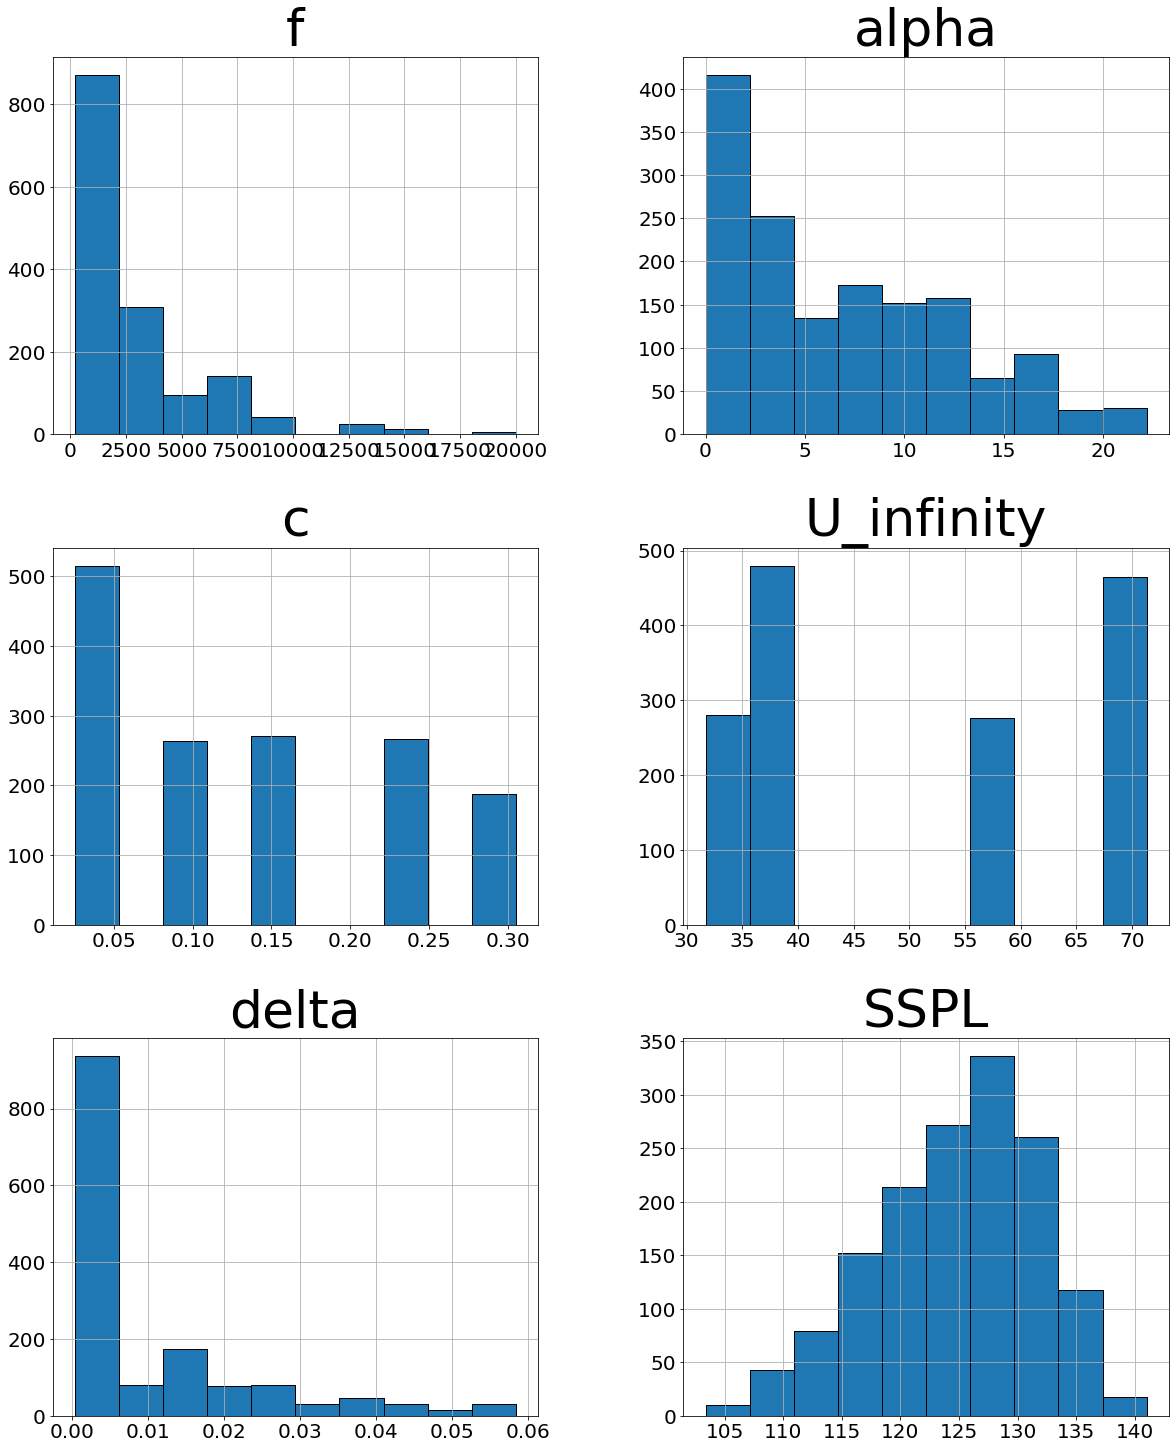

In [7]:
%matplotlib inline

fig= df.hist(xlabelsize=20,ylabelsize=20,ec="k",figsize=(20,25))
[x.title.set_size(52) for x in fig.ravel()]


All the features are highly skewed

In [8]:
df.isna().sum()

f             0
alpha         0
c             0
U_infinity    0
delta         0
SSPL          0
dtype: int64

### Applying log transformation with add 1 to make the dataset distributions more towards normal distribution and rescale the features within range and resuces the skewness from the dataset

In [9]:
df_log=np.log1p(df)

[None, None, None, None, None, None]

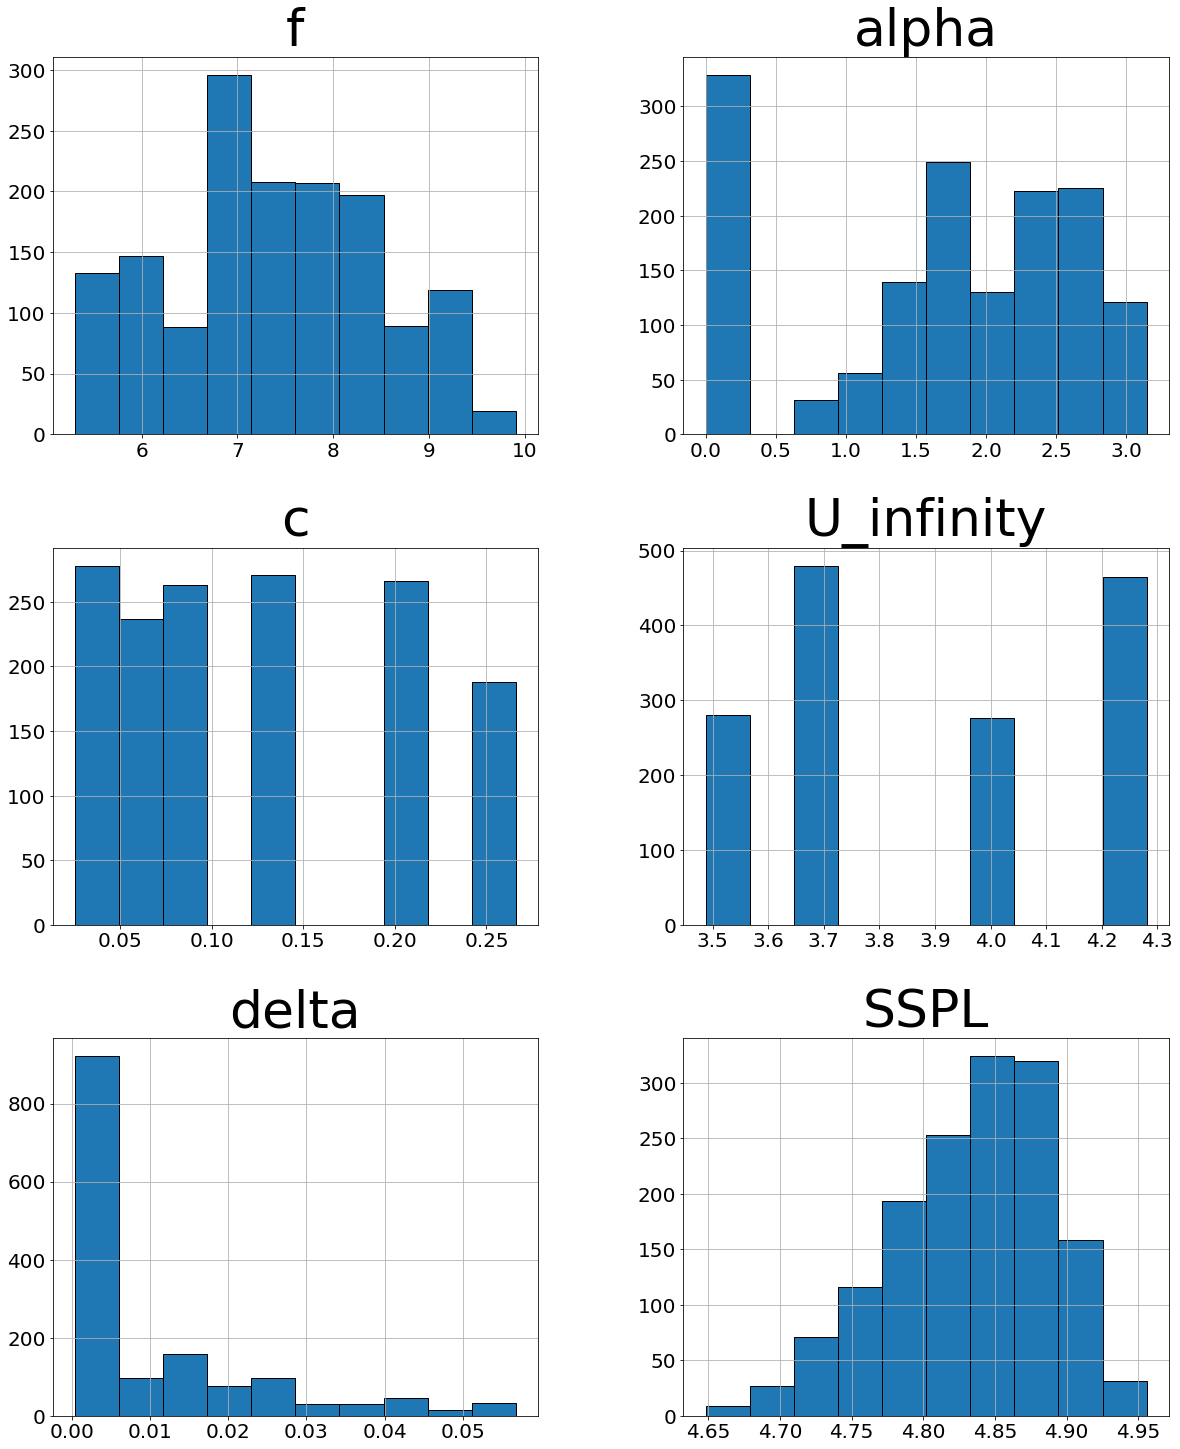

In [10]:
%matplotlib inline
# fig = plt.figure(figsize = (20,25))
# ax = fig.gca()
# df_log.hist(ax=ax)

fig= df_log.hist(xlabelsize=20,ylabelsize=20,ec="k",figsize=(20,25))
[x.title.set_size(52) for x in fig.ravel()]


after applying log transformation the features have become more normally distributed

#### We will do further all analysis on this dataset with logtransformation

In [11]:
df_log.corr()

f  alpha     c  U_infinity  delta  SSPL
f           1.00  -0.30 -0.00        0.11  -0.26 -0.36
alpha      -0.30   1.00 -0.38        0.06   0.66 -0.14
c          -0.00  -0.38  1.00        0.00  -0.21 -0.23
U_infinity  0.11   0.06  0.00        1.00  -0.00  0.12
delta      -0.26   0.66 -0.21       -0.00   1.00 -0.32
SSPL       -0.36  -0.14 -0.23        0.12  -0.32  1.00

In [12]:
df.corr()

f  alpha     c  U_infinity  delta  SSPL
f           1.00  -0.27 -0.00        0.13  -0.23 -0.39
alpha      -0.27   1.00 -0.50        0.06   0.75 -0.16
c          -0.00  -0.50  1.00        0.00  -0.22 -0.24
U_infinity  0.13   0.06  0.00        1.00  -0.00  0.13
delta      -0.23   0.75 -0.22       -0.00   1.00 -0.31
SSPL       -0.39  -0.16 -0.24        0.13  -0.31  1.00

## Correlation

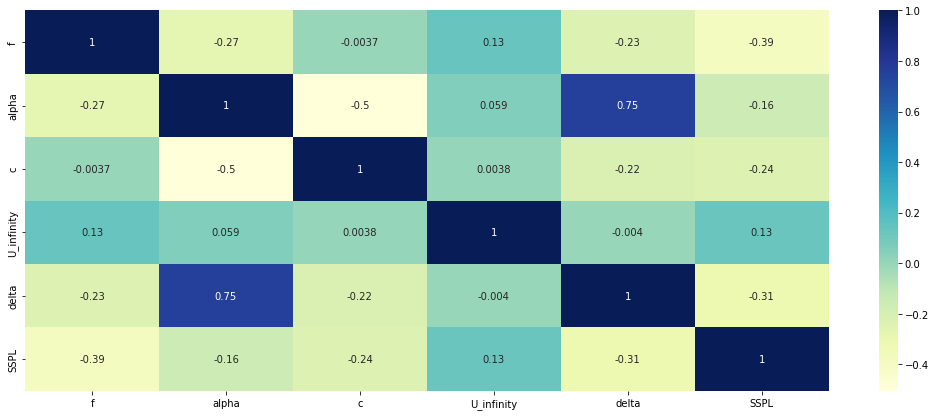

In [13]:
cor=df.corr()
plt.figure(figsize=(18, 7))
dataplot = sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

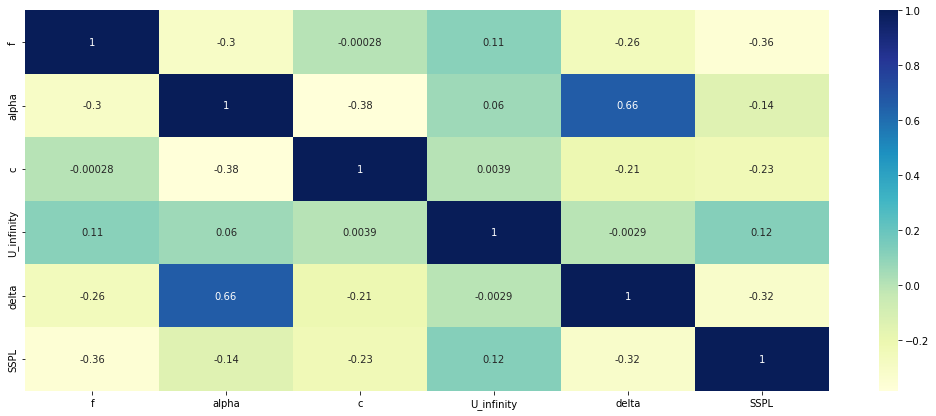

In [14]:
cor=df_log.corr()
plt.figure(figsize=(18, 7))
dataplot = sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Feature Selection

In [15]:
dfs = pd.DataFrame()

X=df_log.drop(columns=['SSPL'])
y=df_log['SSPL']


trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int


mi_scores_d = mutual_info_regression(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)


dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingRegressor(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeRegressor(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df_log.corr()


cor_target = abs(cor['SSPL'])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)


dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB

dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


MI  Decission_Tree  Random_Forrest  Gradient_Boosting  \
delta      0.17            0.51            0.41               0.47   
f          0.16            0.40            0.42               0.41   
c          0.09            0.07            0.11               0.07   
alpha      0.11            0.01            0.04               0.01   
U_infinity 0.03            0.01            0.02               0.04   

            Correlation_Default  sum  
delta                      0.32 1.87  
f                          0.36 1.75  
c                          0.23 0.58  
alpha                      0.14 0.32  
U_infinity                 0.12 0.22

### chosing the best top 4 features

## Making X,y

In [16]:
df_copy=df.copy()

In [17]:
df.columns

Index(['f', 'alpha', 'c', 'U_infinity', 'delta', 'SSPL'], dtype='object')

## Making train and test split

In [18]:
# # df=df.sample(frac =.5)
# # print(df.shape)

X=df_log.drop(columns=['U_infinity', 'SSPL'])
y=df_log['SSPL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)



## Using Lazy predict to rub regression models

### Making prediction on full dataset with lazy predict

In [19]:

reg = LazyRegressor(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models_1)


  7%|▋         | 3/42 [00:00<00:01, 29.32it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.6798571734445104, 'Adjusted R-Squared': 0.6755309190315983, 'RMSE': 0.0328121239639056, 'Time taken': 0.06901717185974121}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9062577262194711, 'Adjusted R-Squared': 0.9049909387359504, 'RMSE': 0.017755389253620597, 'Time taken': 0.024425983428955078}
{'Model': 'BayesianRidge', 'R-Squared': 0.4585578386407928, 'Adjusted R-Squared': 0.4512410526764792, 'RMSE': 0.04267155717440522, 'Time taken': 0.008461713790893555}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.8542358110088187, 'Adjusted R-Squared': 0.8522660246711, 'RMSE': 0.022140523047899034, 'Time taken': 0.009932518005371094}
{'Model': 'DummyRegressor', 'R-Squared': -0.0036548470391293275, 'Adjusted R-Squared': -0.017217750377495955, 'RMSE': 0.058097126057429456, 'Time taken': 0.0055882930755615234}
{'Model': 'ElasticNet', 'R-Squared': -0.0036548470391293275, 'Adjusted R-Squared': -0.017217750377495955, 'RMSE': 0.058097126057429456, 'Time t

 21%|██▏       | 9/42 [00:00<00:01, 29.52it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.916815132519418, 'Adjusted R-Squared': 0.9156910126885993, 'RMSE': 0.01672571224165941, 'Time taken': 0.13885951042175293}
{'Model': 'GammaRegressor', 'R-Squared': 0.27211034527265554, 'Adjusted R-Squared': 0.26227399858715084, 'RMSE': 0.04947607390681894, 'Time taken': 0.009935855865478516}


 26%|██▌       | 11/42 [00:00<00:02, 14.25it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.7349102501745495, 'Adjusted R-Squared': 0.7313279562579893, 'RMSE': 0.029857876941189104, 'Time taken': 0.2968752384185791}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8418309963055077, 'Adjusted R-Squared': 0.8396935773366632, 'RMSE': 0.02306339014290178, 'Time taken': 0.08887743949890137}


 38%|███▊      | 16/42 [00:01<00:02, 11.90it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9171475798446846, 'Adjusted R-Squared': 0.9160279525452885, 'RMSE': 0.016692256727862967, 'Time taken': 0.24397850036621094}
{'Model': 'HuberRegressor', 'R-Squared': 0.46650699940664175, 'Adjusted R-Squared': 0.4592976345337585, 'RMSE': 0.042357158596586134, 'Time taken': 0.012588024139404297}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8598498593878369, 'Adjusted R-Squared': 0.8579559385687536, 'RMSE': 0.021709970085831774, 'Time taken': 0.01177668571472168}
{'Model': 'KernelRidge', 'R-Squared': -6953.108522509239, 'Adjusted R-Squared': -7047.082962002608, 'RMSE': 4.835965434332191, 'Time taken': 0.11645174026489258}
{'Model': 'Lars', 'R-Squared': 0.4590282199116933, 'Adjusted R-Squared': 0.45171779045104044, 'RMSE': 0.04265301755556877, 'Time taken': 0.02211737632751465}


 48%|████▊     | 20/42 [00:01<00:01, 14.74it/s]

{'Model': 'LarsCV', 'R-Squared': 0.4590282199116933, 'Adjusted R-Squared': 0.45171779045104044, 'RMSE': 0.04265301755556877, 'Time taken': 0.04059863090515137}
{'Model': 'Lasso', 'R-Squared': -0.0036548470391293275, 'Adjusted R-Squared': -0.017217750377495955, 'RMSE': 0.058097126057429456, 'Time taken': 0.014177322387695312}
{'Model': 'LassoCV', 'R-Squared': 0.4587258893845323, 'Adjusted R-Squared': 0.45141137437621515, 'RMSE': 0.042664934543269604, 'Time taken': 0.040868520736694336}
{'Model': 'LassoLars', 'R-Squared': -0.0036548470391293275, 'Adjusted R-Squared': -0.017217750377495955, 'RMSE': 0.058097126057429456, 'Time taken': 0.008089065551757812}
{'Model': 'LassoLarsCV', 'R-Squared': 0.4590282199116933, 'Adjusted R-Squared': 0.45171779045104044, 'RMSE': 0.04265301755556877, 'Time taken': 0.011578798294067383}
{'Model': 'LassoLarsIC', 'R-Squared': 0.4590282199116933, 'Adjusted R-Squared': 0.45171779045104044, 'RMSE': 0.04265301755556877, 'Time taken': 0.006343841552734375}
{'Model

 67%|██████▋   | 28/42 [00:02<00:01, 10.06it/s]

{'Model': 'MLPRegressor', 'R-Squared': -6.728534642657589, 'Adjusted R-Squared': -6.8329742999908, 'RMSE': 0.16121707415772704, 'Time taken': 1.033588171005249}
{'Model': 'NuSVR', 'R-Squared': 0.8696034551562917, 'Adjusted R-Squared': 0.8678413396854308, 'RMSE': 0.02094090748318556, 'Time taken': 0.17714667320251465}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.0957016830053451, 'Adjusted R-Squared': 0.08348143547839026, 'RMSE': 0.05514654612724682, 'Time taken': 0.008192062377929688}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.4590282199116933, 'Adjusted R-Squared': 0.45171779045104044, 'RMSE': 0.04265301755556877, 'Time taken': 0.010523319244384766}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.2880343433146475, 'Adjusted R-Squared': 0.27841318579187235, 'RMSE': 0.04893188862994402, 'Time taken': 0.00930333137512207}
{'Model': 'PoissonRegressor', 'R-Squared': 0.4146718448727923, 'Adjusted R-Squared': 0.4067620049386408, 'RMSE': 0.04436721452079923, 'Time

 76%|███████▌  | 32/42 [00:32<00:23,  2.35s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.007710017545951464, 'Adjusted R-Squared': -0.021327720485761814, 'RMSE': 0.05821437565718234, 'Time taken': 30.320285081863403}
{'Model': 'RANSACRegressor', 'R-Squared': 0.3499926801725973, 'Adjusted R-Squared': 0.341208797472227, 'RMSE': 0.046754302219530405, 'Time taken': 0.05217123031616211}


 81%|████████  | 34/42 [00:33<00:13,  1.69s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9136145911569731, 'Adjusted R-Squared': 0.9124472207672024, 'RMSE': 0.017044436691756374, 'Time taken': 0.25551629066467285}
{'Model': 'Ridge', 'R-Squared': 0.4589013389767238, 'Adjusted R-Squared': 0.45158919490884164, 'RMSE': 0.042658019237408265, 'Time taken': 0.01918935775756836}
{'Model': 'RidgeCV', 'R-Squared': 0.45890133897680463, 'Adjusted R-Squared': 0.4515891949089236, 'RMSE': 0.04265801923740508, 'Time taken': 0.015139341354370117}
{'Model': 'SGDRegressor', 'R-Squared': 0.45827173630659757, 'Adjusted R-Squared': 0.45095108409452456, 'RMSE': 0.0426828296801781, 'Time taken': 0.014514684677124023}
{'Model': 'SVR', 'R-Squared': 0.31724658407808015, 'Adjusted R-Squared': 0.3080201865656217, 'RMSE': 0.047917527079907714, 'Time taken': 0.008783578872680664}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.4590282199116932, 'Adjusted R-Squared': 0.4517177904510403, 'RMSE': 0.04265301755556878, 'Time taken': 0.00711345672607421

100%|██████████| 42/42 [00:33<00:00,  1.25it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9415662467721637, 'Adjusted R-Squared': 0.940776601458274, 'RMSE': 0.014018267634380223, 'Time taken': 0.3171687126159668}
{'Model': 'LGBMRegressor', 'R-Squared': 0.9166561753776975, 'Adjusted R-Squared': 0.9155299074773962, 'RMSE': 0.016741685113868587, 'Time taken': 0.08096837997436523}
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
XGBRegressor                                 0.94       0.94  0.01        0.32
HistGradientBoostingRegressor                0.92       0.92  0.02        0.24
ExtraTreesRegressor                          0.92       0.92  0.02        0.14
LGBMRegressor                                0.92       0.92  0.02        0.08
RandomForestRegressor                        0.91       0.91  0.02        0.26
BaggingRegressor                             0.90       0.91  0.02        0.02
NuSVR                                

### Making prediction on train-test dataset with lazy predict

In [20]:

reg = LazyRegressor(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models_1)


 17%|█▋        | 7/42 [00:00<00:04,  8.15it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.6798571734445104, 'Adjusted R-Squared': 0.6755309190315983, 'RMSE': 0.0328121239639056, 'Time taken': 0.16278290748596191}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9062577262194711, 'Adjusted R-Squared': 0.9049909387359504, 'RMSE': 0.017755389253620597, 'Time taken': 0.05216574668884277}
{'Model': 'BayesianRidge', 'R-Squared': 0.4585578386407928, 'Adjusted R-Squared': 0.4512410526764792, 'RMSE': 0.04267155717440522, 'Time taken': 0.008703231811523438}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.8542358110088187, 'Adjusted R-Squared': 0.8522660246711, 'RMSE': 0.022140523047899034, 'Time taken': 0.011861324310302734}
{'Model': 'DummyRegressor', 'R-Squared': -0.0036548470391293275, 'Adjusted R-Squared': -0.017217750377495955, 'RMSE': 0.058097126057429456, 'Time taken': 0.008907556533813477}
{'Model': 'ElasticNet', 'R-Squared': -0.0036548470391293275, 'Adjusted R-Squared': -0.017217750377495955, 'RMSE': 0.058097126057429456, 'Time tak

 26%|██▌       | 11/42 [00:00<00:03,  9.24it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.916815132519418, 'Adjusted R-Squared': 0.9156910126885993, 'RMSE': 0.01672571224165941, 'Time taken': 0.19231128692626953}
{'Model': 'GammaRegressor', 'R-Squared': 0.27211034527265554, 'Adjusted R-Squared': 0.26227399858715084, 'RMSE': 0.04947607390681894, 'Time taken': 0.0104827880859375}
{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.7349102501745495, 'Adjusted R-Squared': 0.7313279562579893, 'RMSE': 0.029857876941189104, 'Time taken': 0.1669783592224121}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8418309963055077, 'Adjusted R-Squared': 0.8396935773366632, 'RMSE': 0.02306339014290178, 'Time taken': 0.11277389526367188}


 38%|███▊      | 16/42 [00:01<00:03,  8.42it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9171475798446846, 'Adjusted R-Squared': 0.9160279525452885, 'RMSE': 0.016692256727862967, 'Time taken': 0.35024499893188477}
{'Model': 'HuberRegressor', 'R-Squared': 0.46650699940664175, 'Adjusted R-Squared': 0.4592976345337585, 'RMSE': 0.042357158596586134, 'Time taken': 0.021532297134399414}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8598498593878369, 'Adjusted R-Squared': 0.8579559385687536, 'RMSE': 0.021709970085831774, 'Time taken': 0.01142263412475586}
{'Model': 'KernelRidge', 'R-Squared': -6953.108522509239, 'Adjusted R-Squared': -7047.082962002608, 'RMSE': 4.835965434332191, 'Time taken': 0.13135671615600586}


 48%|████▊     | 20/42 [00:01<00:02, 10.71it/s]

{'Model': 'Lars', 'R-Squared': 0.4590282199116933, 'Adjusted R-Squared': 0.45171779045104044, 'RMSE': 0.04265301755556877, 'Time taken': 0.060538291931152344}
{'Model': 'LarsCV', 'R-Squared': 0.4590282199116933, 'Adjusted R-Squared': 0.45171779045104044, 'RMSE': 0.04265301755556877, 'Time taken': 0.0154266357421875}
{'Model': 'Lasso', 'R-Squared': -0.0036548470391293275, 'Adjusted R-Squared': -0.017217750377495955, 'RMSE': 0.058097126057429456, 'Time taken': 0.008904457092285156}
{'Model': 'LassoCV', 'R-Squared': 0.4587258893845323, 'Adjusted R-Squared': 0.45141137437621515, 'RMSE': 0.042664934543269604, 'Time taken': 0.04302859306335449}
{'Model': 'LassoLars', 'R-Squared': -0.0036548470391293275, 'Adjusted R-Squared': -0.017217750377495955, 'RMSE': 0.058097126057429456, 'Time taken': 0.018216371536254883}
{'Model': 'LassoLarsCV', 'R-Squared': 0.4590282199116933, 'Adjusted R-Squared': 0.45171779045104044, 'RMSE': 0.04265301755556877, 'Time taken': 0.03403282165527344}
{'Model': 'LassoL

 60%|█████▉    | 25/42 [00:01<00:01, 13.40it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.458798846547655, 'Adjusted R-Squared': 0.45148531744694764, 'RMSE': 0.04266205908938768, 'Time taken': 0.06585836410522461}
{'Model': 'MLPRegressor', 'R-Squared': -6.728534642657589, 'Adjusted R-Squared': -6.8329742999908, 'RMSE': 0.16121707415772704, 'Time taken': 1.176945447921753}


 67%|██████▋   | 28/42 [00:03<00:02,  5.07it/s]

{'Model': 'NuSVR', 'R-Squared': 0.8696034551562917, 'Adjusted R-Squared': 0.8678413396854308, 'RMSE': 0.02094090748318556, 'Time taken': 0.2503218650817871}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.0957016830053451, 'Adjusted R-Squared': 0.08348143547839026, 'RMSE': 0.05514654612724682, 'Time taken': 0.021962404251098633}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.4590282199116933, 'Adjusted R-Squared': 0.45171779045104044, 'RMSE': 0.04265301755556877, 'Time taken': 0.033951520919799805}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.2880343433146475, 'Adjusted R-Squared': 0.27841318579187235, 'RMSE': 0.04893188862994402, 'Time taken': 0.011849164962768555}
{'Model': 'PoissonRegressor', 'R-Squared': 0.4146718448727923, 'Adjusted R-Squared': 0.4067620049386408, 'RMSE': 0.04436721452079923, 'Time taken': 0.013793706893920898}


 76%|███████▌  | 32/42 [00:35<00:25,  2.58s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.007710017545951464, 'Adjusted R-Squared': -0.021327720485761814, 'RMSE': 0.05821437565718234, 'Time taken': 32.436553955078125}
{'Model': 'RANSACRegressor', 'R-Squared': 0.3499926801725973, 'Adjusted R-Squared': 0.341208797472227, 'RMSE': 0.046754302219530405, 'Time taken': 0.039972543716430664}


 81%|████████  | 34/42 [00:35<00:14,  1.85s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9136145911569731, 'Adjusted R-Squared': 0.9124472207672024, 'RMSE': 0.017044436691756374, 'Time taken': 0.2878725528717041}
{'Model': 'Ridge', 'R-Squared': 0.4589013389767238, 'Adjusted R-Squared': 0.45158919490884164, 'RMSE': 0.042658019237408265, 'Time taken': 0.012552261352539062}
{'Model': 'RidgeCV', 'R-Squared': 0.45890133897680463, 'Adjusted R-Squared': 0.4515891949089236, 'RMSE': 0.04265801923740508, 'Time taken': 0.012337684631347656}
{'Model': 'SGDRegressor', 'R-Squared': 0.45827173630659757, 'Adjusted R-Squared': 0.45095108409452456, 'RMSE': 0.0426828296801781, 'Time taken': 0.012325048446655273}
{'Model': 'SVR', 'R-Squared': 0.31724658407808015, 'Adjusted R-Squared': 0.3080201865656217, 'RMSE': 0.047917527079907714, 'Time taken': 0.01579880714416504}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.4590282199116932, 'Adjusted R-Squared': 0.4517177904510403, 'RMSE': 0.04265301755556878, 'Time taken': 0.014264822006225586

100%|██████████| 42/42 [00:36<00:00,  1.15it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9415662467721637, 'Adjusted R-Squared': 0.940776601458274, 'RMSE': 0.014018267634380223, 'Time taken': 0.31724977493286133}
{'Model': 'LGBMRegressor', 'R-Squared': 0.9166561753776975, 'Adjusted R-Squared': 0.9155299074773962, 'RMSE': 0.016741685113868587, 'Time taken': 0.06386756896972656}
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
XGBRegressor                                 0.94       0.94  0.01        0.32
HistGradientBoostingRegressor                0.92       0.92  0.02        0.35
ExtraTreesRegressor                          0.92       0.92  0.02        0.19
LGBMRegressor                                0.92       0.92  0.02        0.06
RandomForestRegressor                        0.91       0.91  0.02        0.29
BaggingRegressor                             0.90       0.91  0.02        0.05
NuSVR                               

### Making a datframe to store results

In [21]:
df_results_r1=pd.DataFrame(columns=['model_name','sampling/VI_method','RMSE','MSE','R2','Adj_R2','model_details'])

df_results_r1

Empty DataFrame
Columns: [model_name, sampling/VI_method, RMSE, MSE, R2, Adj_R2, model_details]
Index: []

## Linear Regression (ML)

### Making prediction on full dataset (no log transformation) with Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

Xs=df.drop(columns=['U_infinity', 'SSPL'])
ys=df['SSPL']

# Xs=df.drop()
# ys=df[]
reg.fit(Xs, ys)

ys_p=reg.predict(Xs)

p= len(Xs.columns)
print(p)
n= len(Xs.index)
print(n)

rmse = mean_squared_error(ys, ys_p, squared=False)
print(rmse)
mse = mean_squared_error(ys, ys_p)
print(mse)
r2= r2_score(ys, ys_p)
print(r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print(Adj_r2)

df_results_r1= df_results_r1.append({'model_name':'Linear Regression-Full dataste(no log transformation)','sampling/VI_method':'NA','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':reg},ignore_index=True)


4
1503
5.035121901788053
25.35245256586574
0.4669352442941901
0.4655118404071251


In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

y_p=reg.predict(X)

p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y, y_p, squared=False)
print(rmse)
mse = mean_squared_error(y, y_p)
print(mse)
r2= r2_score(y, y_p)
print(r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print(Adj_r2)

df_results_r1= df_results_r1.append({'model_name':'Linear Regression-Full dataste','sampling/VI_method':'NA','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':reg},ignore_index=True)


4
1503
0.04167007837923012
0.0017363954321311813
0.43872535700294313
0.4372266263140324


In [24]:
df_results_r1

model_name sampling/VI_method  RMSE  \
0  Linear Regression-Full dataste(no log transfor...                 NA  5.04   
1                     Linear Regression-Full dataste                 NA  0.04   

    MSE   R2  Adj_R2       model_details  
0 25.35 0.47    0.47  LinearRegression()  
1  0.00 0.44    0.44  LinearRegression()

### LR on train test split

In [25]:
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_p=reg.predict(X_test)

p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y_test, y_p, squared=False)
print(rmse)
mse = mean_squared_error(y_test, y_p)
print(mse)
r2= r2_score(y_test, y_p)
print(r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print(Adj_r2)

df_results_r1= df_results_r1.append({'model_name':'Linear Regression-tain/test dataste','sampling/VI_method':'NA','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':reg},ignore_index=True)


4
1503
0.042653017555568766
0.001819279906595657
0.4590282199116936
0.4575837024748757


#### Making variables for pymc models

In [26]:
Xv=X.values
yv=y.values
Xv_train=X_train.values
Xv_test=X_test.values
print(Xv_train.shape,Xv_test.shape)
yv_train=y_train.values
yv_test=y_test.values
print(yv_train.shape,yv_test.shape)


(1202, 4) (301, 4)
(1202,) (301,)


### making vars for prior for each feature

In [27]:
df_log.describe()

f   alpha       c  U_infinity   delta    SSPL
count 1503.00 1503.00 1503.00     1503.00 1503.00 1503.00
mean     7.43    1.65    0.12        3.90    0.01    4.83
std      1.08    1.01    0.08        0.30    0.01    0.06
min      5.30    0.00    0.03        3.49    0.00    4.65
25%      6.69    1.10    0.05        3.70    0.00    4.80
50%      7.38    1.86    0.10        3.70    0.00    4.84
75%      8.29    2.39    0.21        4.28    0.02    4.88
max      9.90    3.14    0.27        4.28    0.06    4.96

In [28]:
X_f_v=df_log['f'].values

X_alpha_v= df_log['alpha'].values

X_c_v=df_log['c'].values

X_delta_v =df_log['delta'].values



X_f=df_log['f']

X_alpha= df_log['alpha']

X_c=df_log['c']

X_delta =df_log['delta']

X_f_test_v=X_test['f'].values

X_alpha_test_v= X_test['alpha'].values

X_c_test_v=X_test['c'].values

X_delta_test_v=X_test['delta'].values



X_f_test=X_test['f']

X_alpha_test= X_test['alpha']

X_c_test=X_test['c']

X_delta_test=X_test['delta']


X_f_train_v=X_train['f'].values

X_alpha_train_v= X_train['alpha'].values

X_c_train_v=X_train['c'].values

X_delta_train_v=X_train['delta'].values



X_f_train=X_train['f']

X_alpha_train= X_train['alpha']

X_c_train=X_train['c']

X_delta_train=X_train['delta']

### Selection of priors



β_f = pm.Normal('β_f', mu=8, sd=2)
β_alpha = pm.Normal('β_alpha', mu=2, sd=1)
β_c = pm.Normal('β_c', mu=0.12, sd=0.1)
β_delta = pm.Exponential('β_delta', lam=10)

[None, None, None, None, None, None]

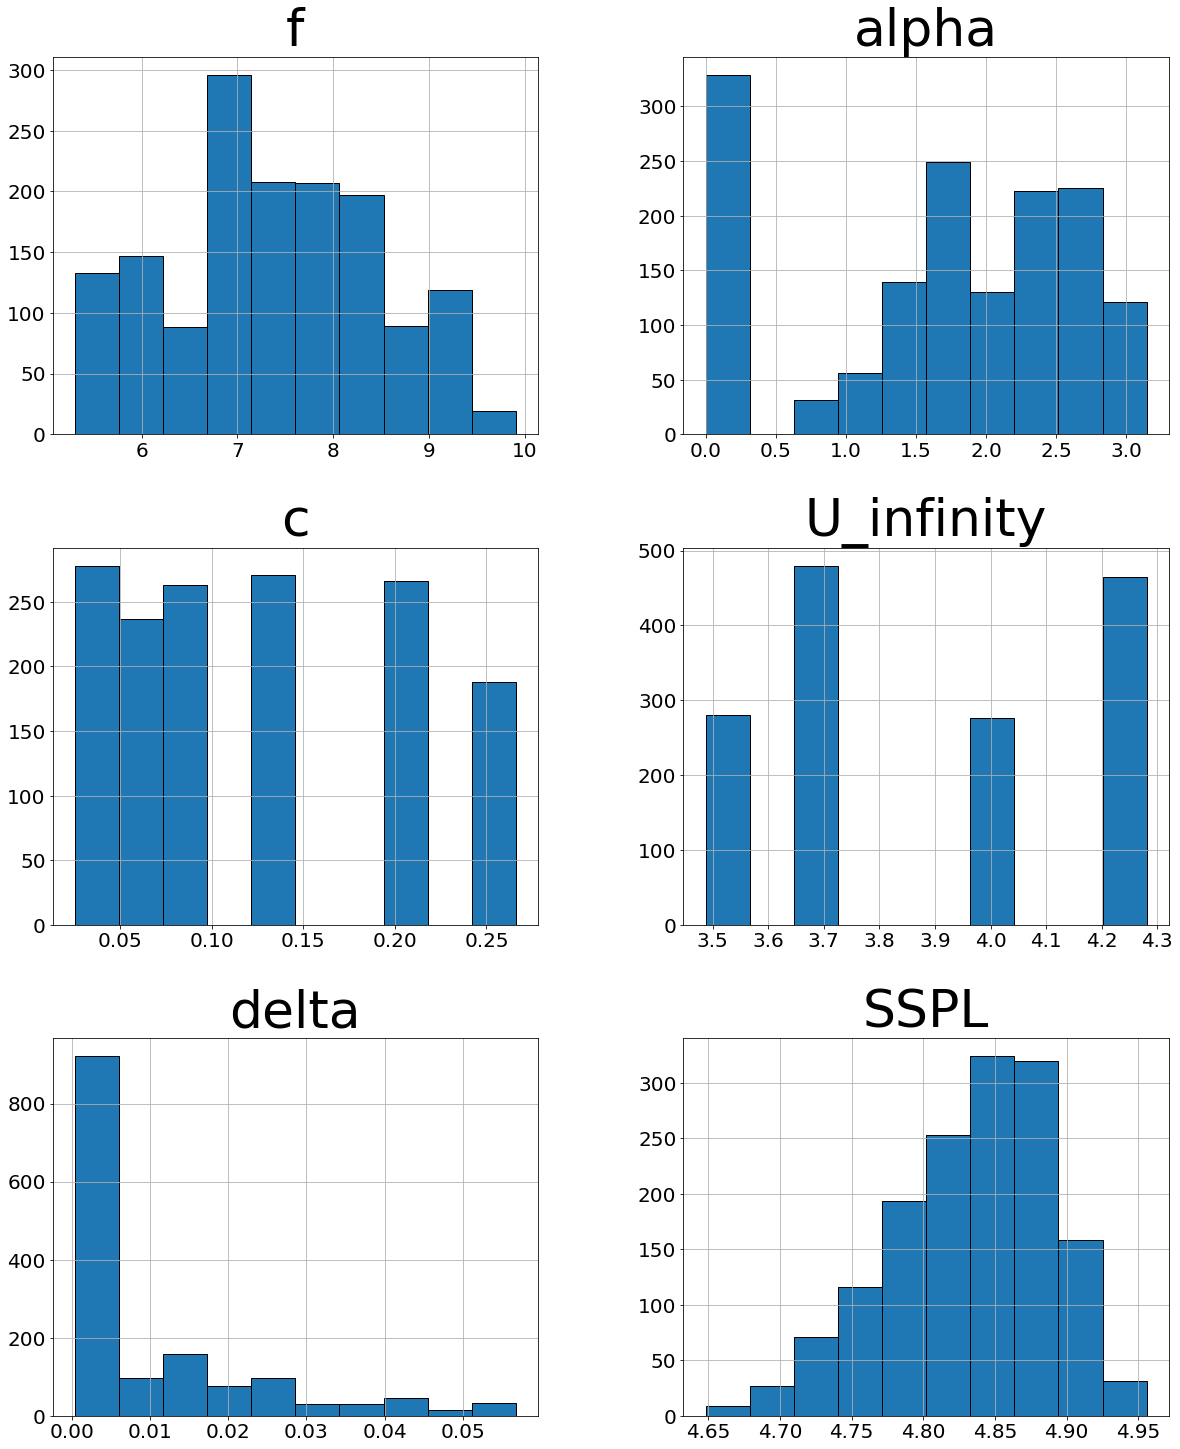

In [29]:

fig= df_log.hist(xlabelsize=20,ylabelsize=20,ec="k",figsize=(20,25))
[x.title.set_size(52) for x in fig.ravel()]



## Applying MCMC

### Doing Multiple Linear Regression using default NUTS sampler

## MLR NUTS on full dataset

#### 1)	Generic weakly informative prior: normal(0, 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β_delta, β_c, β_alpha, β_f, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 92 seconds.


4
1503
Root mean square error :  0.041670668152836
Mean square error :  0.0017364445843037805
R2-score :  0.43870946899286334
Adjusted R2-score :  0.43721069587935957


mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
α        5.10 0.01    5.08     5.12       0.00     0.00  19550.00 19548.00   
β_f     -0.03 0.00   -0.03    -0.03       0.00     0.00  21485.00 21420.00   
β_alpha -0.01 0.00   -0.01    -0.01       0.00     0.00  22543.00 22442.00   
β_c     -0.27 0.01   -0.30    -0.24       0.00     0.00  28234.00 28234.00   
β_delta -1.81 0.11   -2.02    -1.60       0.00     0.00  26013.00 26013.00   
ϵ        0.04 0.00    0.04     0.04       0.00     0.00  32576.00 32576.00   

         ess_bulk  ess_tail  r_hat  
α        19573.00  21098.00   1.00  
β_f      21508.00  22154.00   1.00  
β_alpha  22546.00  25474.00   1.00  
β_c      28252.00  26180.00   1.00  
β_delta  26017.00  26412.00   1.00  
ϵ        32564.00  26137.00   1.00

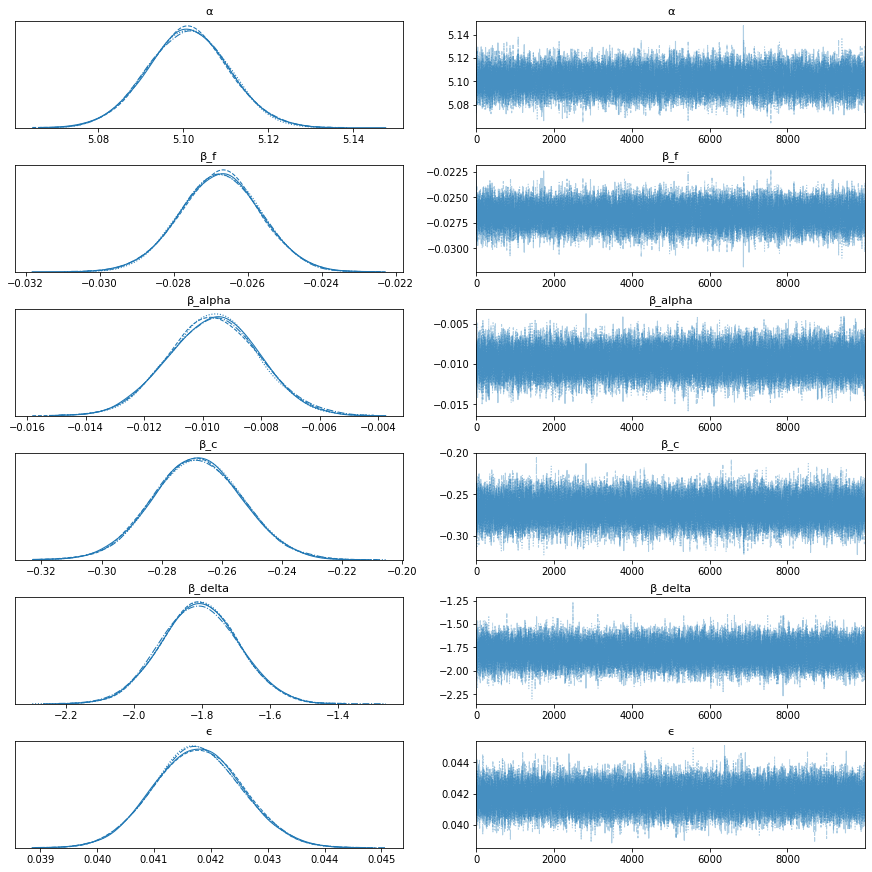

In [30]:
with pm.Model() as model_mlr:

    # Priors
    α = pm.Normal('α', mu=0, sd=1) # Try changing the prior distribution
    
    β_f = pm.Normal('β_f', mu=0, sd=1)
    β_alpha = pm.Normal('β_alpha', mu=0, sd=1)
    β_c = pm.Normal('β_c', mu=0, sd=1)
    β_delta = pm.Normal('β_delta', mu=0., sd=1)
   
    ϵ = pm.HalfCauchy('ϵ', 5)
 
    μ = α + X_f_v*β_f + X_alpha_v*β_alpha + X_c_v*β_c + X_delta_v*β_delta
    
    # likelihood

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=yv)

    trace = pm.sample(10000, tune=1000)


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_f=trace['β_f'].mean()
beta_alpha=trace['β_alpha'].mean()
beta_c=trace['β_c'].mean()
beta_delta=trace['β_delta'].mean()



# Predicted y oytput
y_p = alpha + beta_f*X_f + beta_alpha*X_alpha + beta_c*X_c + beta_delta*X_delta


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(y, y_p)
print('Mean square error : ',mse)
r2= r2_score(y, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-Nuts-Full datastet (general priors','sampling/VI_method':'NUTS',
                                     'RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)


In [31]:
model_mlr

#### 2)	Specific informative prior: based on our dataset

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β_delta, β_c, β_alpha, β_f, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 166 seconds.
The acceptance probability does not match the target. It is 0.8881758782635308, but should be close to 0.8. Try to increase the number of tuning steps.


4
1503
Root mean square error :  0.04287680383472859
Mean square error :  0.001838420307081796
R2-score :  0.40574670812776026
Adjusted R2-score :  0.40415991696121223


mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
α        5.10 0.01    5.08     5.12       0.00     0.00  20328.00 20327.00   
β_f     -0.03 0.00   -0.03    -0.02       0.00     0.00  23332.00 23303.00   
β_alpha -0.02 0.00   -0.02    -0.01       0.00     0.00  22742.00 22729.00   
β_c     -0.27 0.01   -0.29    -0.24       0.00     0.00  28372.00 28372.00   
β_delta -0.78 0.08   -0.92    -0.64       0.00     0.00  27018.00 27018.00   
ϵ        0.04 0.00    0.04     0.04       0.00     0.00  30864.00 30828.00   

         ess_bulk  ess_tail  r_hat  
α        20317.00  22270.00   1.00  
β_f      23333.00  24841.00   1.00  
β_alpha  22745.00  25421.00   1.00  
β_c      28356.00  25898.00   1.00  
β_delta  27016.00  27034.00   1.00  
ϵ        30892.00  26169.00   1.00

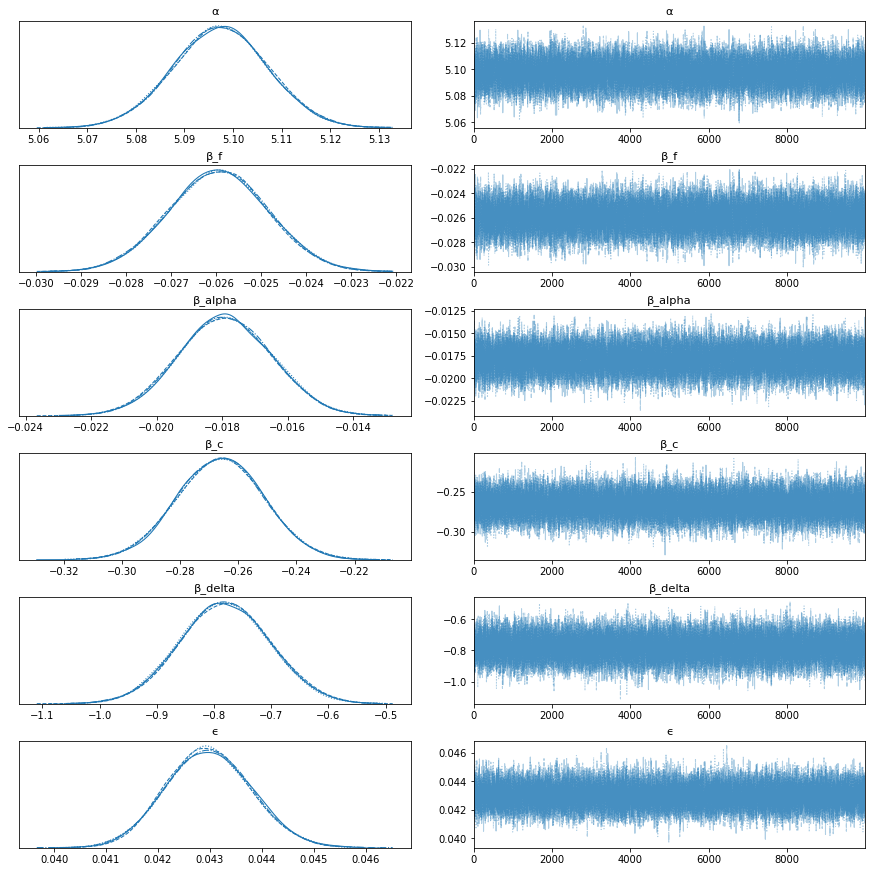

In [32]:
with pm.Model() as model_mlr:

    # Prirors
    α = pm.Normal('α', mu=2, sd=2) # Try changing the prior distribution

    β_f = pm.Normal('β_f', mu=8, sd=2)
    β_alpha = pm.Normal('β_alpha', mu=2, sd=1)
    β_c = pm.Normal('β_c', mu=0.12, sd=0.1)
    β_delta = pm.Normal('β_delta', mu=0.01, sd=0.1)
   
    ϵ = pm.HalfCauchy('ϵ', 5)
 
    μ = α + X_f_v*β_f + X_alpha_v*β_alpha + X_c_v*β_c + X_delta_v*β_delta
    
    # Likelihodd

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=yv)
    
    # generating samples and getting posteriror

    trace = pm.sample(10000, tune=1000)


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_f=trace['β_f'].mean()
beta_alpha=trace['β_alpha'].mean()
beta_c=trace['β_c'].mean()
beta_delta=trace['β_delta'].mean()



# Predicted y oytput
y_p = alpha + beta_f*X_f + beta_alpha*X_alpha + beta_c*X_c + beta_delta*X_delta


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(y, y_p)
print('Mean square error : ',mse)
r2= r2_score(y, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-Nuts-Full datastet (Specific priors0','sampling/VI_method':'NUTS','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)


In [33]:
model_mlr

## MLR NUTS on train-test dataset

#### 1)	Generic weakly informative prior: normal(0, 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β_delta, β_c, β_alpha, β_f, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 146 seconds.


4
1503
Root mean square error :  0.04268287945093891
Mean square error :  0.0018218281982233832
R2-score :  0.458270472930024
Adjusted R2-score :  0.45682393213677974


mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
α        5.10 0.01    5.08     5.12       0.00     0.00  17117.00 17117.00   
β_f     -0.03 0.00   -0.03    -0.02       0.00     0.00  18426.00 18426.00   
β_alpha -0.01 0.00   -0.01    -0.01       0.00     0.00  21227.00 21215.00   
β_c     -0.26 0.02   -0.29    -0.23       0.00     0.00  25712.00 25632.00   
β_delta -1.72 0.12   -1.95    -1.48       0.00     0.00  26267.00 26259.00   
ϵ        0.04 0.00    0.04     0.04       0.00     0.00  30717.00 30717.00   

         ess_bulk  ess_tail  r_hat  
α        17121.00  19925.00   1.00  
β_f      18436.00  21765.00   1.00  
β_alpha  21242.00  23925.00   1.00  
β_c      25736.00  25082.00   1.00  
β_delta  26286.00  25983.00   1.00  
ϵ        30678.00  25814.00   1.00

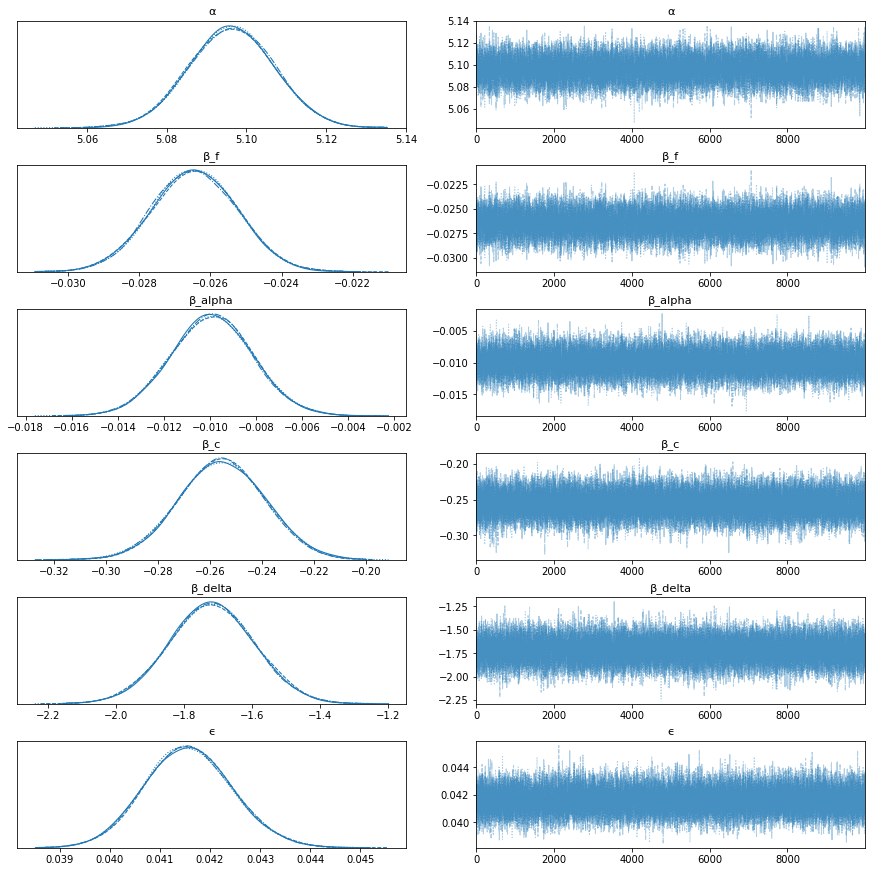

In [34]:
with pm.Model() as model_mlr:

    # Priors
    α = pm.Normal('α', mu=0, sd=1) # Try changing the prior distribution
    
    β_f = pm.Normal('β_f', mu=0, sd=1)
    β_alpha = pm.Normal('β_alpha', mu=0, sd=1)
    β_c = pm.Normal('β_c', mu=0, sd=1)
    β_delta = pm.Normal('β_delta', mu=0., sd=1)
   
    ϵ = pm.HalfCauchy('ϵ', 5)
 
    μ = α + X_f_train_v*β_f + X_alpha_train_v*β_alpha + X_c_train_v*β_c + X_delta_train_v*β_delta
    
    # likelihood

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=yv_train)

    trace = pm.sample(10000, tune=1000)


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_f=trace['β_f'].mean()
beta_alpha=trace['β_alpha'].mean()
beta_c=trace['β_c'].mean()
beta_delta=trace['β_delta'].mean()



# Predicted y oytput
y_p = alpha + beta_f*X_f_test + beta_alpha*X_alpha_test+ beta_c*X_c_test+ beta_delta*X_delta_test


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y_test, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(y_test, y_p)
print('Mean square error : ',mse)
r2= r2_score(y_test, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-Nuts-train/test datastet (general priors','sampling/VI_method':'NUTS','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)


In [35]:
model_mlr

#### 2)	Specific informative prior: based on our dataset

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β_delta, β_c, β_alpha, β_f, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 159 seconds.


4
1503
Root mean square error :  0.044889007342501244
Mean square error :  0.002015022980195131
R2-score :  0.4008230594077149
Adjusted R2-score :  0.3992231209815672


mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
α        5.09 0.01    5.07     5.11       0.00     0.00  20264.00 20262.00   
β_f     -0.03 0.00   -0.03    -0.02       0.00     0.00  22512.00 22497.00   
β_alpha -0.02 0.00   -0.02    -0.02       0.00     0.00  24820.00 24820.00   
β_c     -0.25 0.02   -0.28    -0.22       0.00     0.00  28794.00 28792.00   
β_delta -0.66 0.08   -0.81    -0.51       0.00     0.00  29518.00 29119.00   
ϵ        0.04 0.00    0.04     0.04       0.00     0.00  29882.00 29882.00   

         ess_bulk  ess_tail  r_hat  
α        20261.00  21866.00   1.00  
β_f      22513.00  24703.00   1.00  
β_alpha  24806.00  25076.00   1.00  
β_c      28799.00  26804.00   1.00  
β_delta  29519.00  26452.00   1.00  
ϵ        29858.00  25610.00   1.00

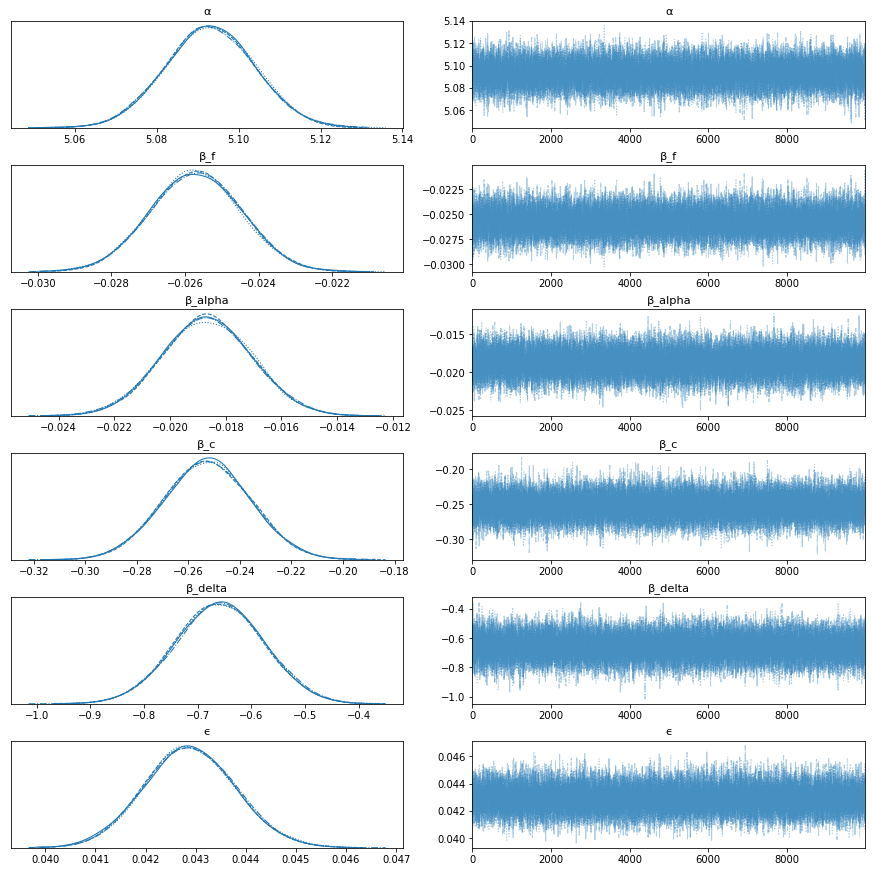

In [36]:
with pm.Model() as model_mlr:

   # Prirors
    α = pm.Normal('α', mu=2, sd=2) # Try changing the prior distribution

    β_f = pm.Normal('β_f', mu=8, sd=2)
    β_alpha = pm.Normal('β_alpha', mu=2, sd=1)
    β_c = pm.Normal('β_c', mu=0.12, sd=0.1)
    β_delta = pm.Normal('β_delta', mu=0.01, sd=0.1)
   
    ϵ = pm.HalfCauchy('ϵ', 5)
 
    μ = α + X_f_train_v*β_f + X_alpha_train_v*β_alpha + X_c_train_v*β_c + X_delta_train_v*β_delta
    
    # likelihood

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=yv_train)

    trace = pm.sample(10000, tune=1000)


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_f=trace['β_f'].mean()
beta_alpha=trace['β_alpha'].mean()
beta_c=trace['β_c'].mean()
beta_delta=trace['β_delta'].mean()



# Predicted y oytput
y_p = alpha + beta_f*X_f_test + beta_alpha*X_alpha_test+ beta_c*X_c_test+ beta_delta*X_delta_test


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y_test, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(y_test, y_p)
print('Mean square error : ',mse)
r2= r2_score(y_test, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-Nuts-train/test datastet (specific priors','sampling/VI_method':'NUTS','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)


In [37]:
model_mlr

## Robust MLR NUTS on full dataset

#### 1)	Generic weakly informative prior: normal(0, 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_, ϵ, β_delta, β_c, β_alpha, β_f, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 913 seconds.


4
1503
Root mean square error :  0.04219689309607303
Mean square error :  0.001780577786961416
R2-score :  0.4244437970683649
Adjusted R2-score :  0.4229069313729533


mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
α        5.15 0.01    5.13     5.17       0.00     0.00  12696.00 12696.00   
β_f     -0.03 0.00   -0.03    -0.03       0.00     0.00  13712.00 13712.00   
β_alpha -0.01 0.00   -0.01    -0.01       0.00     0.00  21450.00 21422.00   
β_c     -0.30 0.01   -0.33    -0.28       0.00     0.00  21220.00 21220.00   
β_delta -2.06 0.11   -2.27    -1.86       0.00     0.00  22706.00 22702.00   
ϵ        0.03 0.00    0.03     0.04       0.00     0.00  16461.00 16451.00   
ν_       5.08 1.11    3.21     7.15       0.01     0.01  14898.00 14890.00   
ν        6.08 1.11    4.21     8.15       0.01     0.01  14898.00 14879.00   

         ess_bulk  ess_tail  r_hat  
α        12698.00  18691.00   1.00  
β_f      13714.00  19665.00   1.00  
β_alpha  21453.00  24773.00   1.00  
β_c      21246.00  24292.00   1.00  
β_delta  22695.00  24606.00   1.00  
ϵ        16476.00  22786.00   1.00  
ν_       15118.00  19993.00   1.00  
ν        15118.00  19993.00   1.00

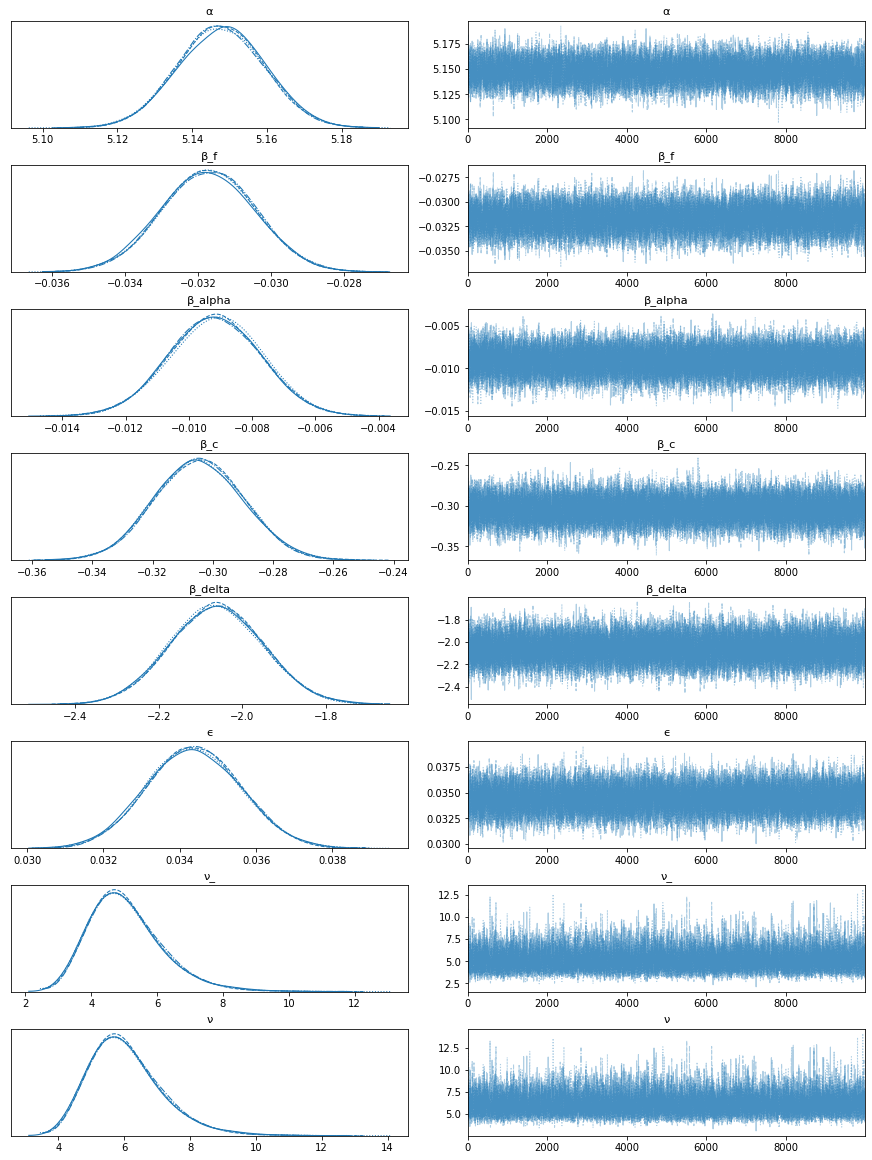

In [38]:
with pm.Model() as model_mlr:

    # Priors
    
    α = pm.Normal('α', mu=y.mean(), sd=1)
    
    β_f = pm.Normal('β_f', mu=0, sd=1)
    β_alpha = pm.Normal('β_alpha', mu=0, sd=1)
    β_c = pm.Normal('β_c', mu=0, sd=1)
    β_delta = pm.Normal('β_delta', mu=0., sd=1)
    
    μ = α + X_f_v*β_f + X_alpha_v*β_alpha + X_c_v*β_c + X_delta_v*β_delta
   
    ϵ = pm.HalfNormal('ϵ', 5)
    ν_ = pm.Exponential('ν_', 1/29)
    ν = pm.Deterministic('ν', ν_ + 1) # shifting the exponential to avoid values close to 0
    
    # likelihood

    y_pred = pm.StudentT('y_pred', mu=μ, sd=ϵ, nu=ν, observed=yv)

    trace = pm.sample(10000, tune=1000)
    
    


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_f=trace['β_f'].mean()
beta_alpha=trace['β_alpha'].mean()
beta_c=trace['β_c'].mean()
beta_delta=trace['β_delta'].mean()



# Predicted y oytput
y_p = alpha + beta_f*X_f + beta_alpha*X_alpha + beta_c*X_c + beta_delta*X_delta


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(y, y_p)
print('Mean square error : ',mse)
r2= r2_score(y, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-Robust-Nuts-Full datastet (general priors','sampling/VI_method':'NUTS','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)


In [39]:
model_mlr

#### 2)	Specific informative prior: based on our dataset

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_, ϵ, β_delta, β_c, β_alpha, β_f, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 237 seconds.
The acceptance probability does not match the target. It is 0.8857634204856107, but should be close to 0.8. Try to increase the number of tuning steps.


4
1503
Root mean square error :  0.0427991720403067
Mean square error :  0.0018317691273357706
R2-score :  0.4078966438327152
Adjusted R2-score :  0.4063155934824687


mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
α        5.12 0.01    5.09     5.14       0.00     0.00  13924.00 13923.00   
β_f     -0.03 0.00   -0.03    -0.03       0.00     0.00  15300.00 15300.00   
β_alpha -0.02 0.00   -0.02    -0.01       0.00     0.00  20853.00 20853.00   
β_c     -0.28 0.01   -0.31    -0.25       0.00     0.00  22198.00 22174.00   
β_delta -0.84 0.08   -0.99    -0.69       0.00     0.00  22080.00 21869.00   
ϵ        0.04 0.00    0.04     0.04       0.00     0.00  17397.00 17339.00   
ν_      14.58 8.64    5.50    27.52       0.07     0.05  14155.00 14155.00   
ν       15.58 8.64    6.50    28.52       0.07     0.05  14155.00 14155.00   

         ess_bulk  ess_tail  r_hat  
α        13924.00  19108.00   1.00  
β_f      15300.00  21008.00   1.00  
β_alpha  20856.00  23770.00   1.00  
β_c      22193.00  24583.00   1.00  
β_delta  22064.00  25375.00   1.00  
ϵ        17411.00  21890.00   1.00  
ν_       16847.00  17377.00   1.00  
ν        16847.00  17377.00   1.00

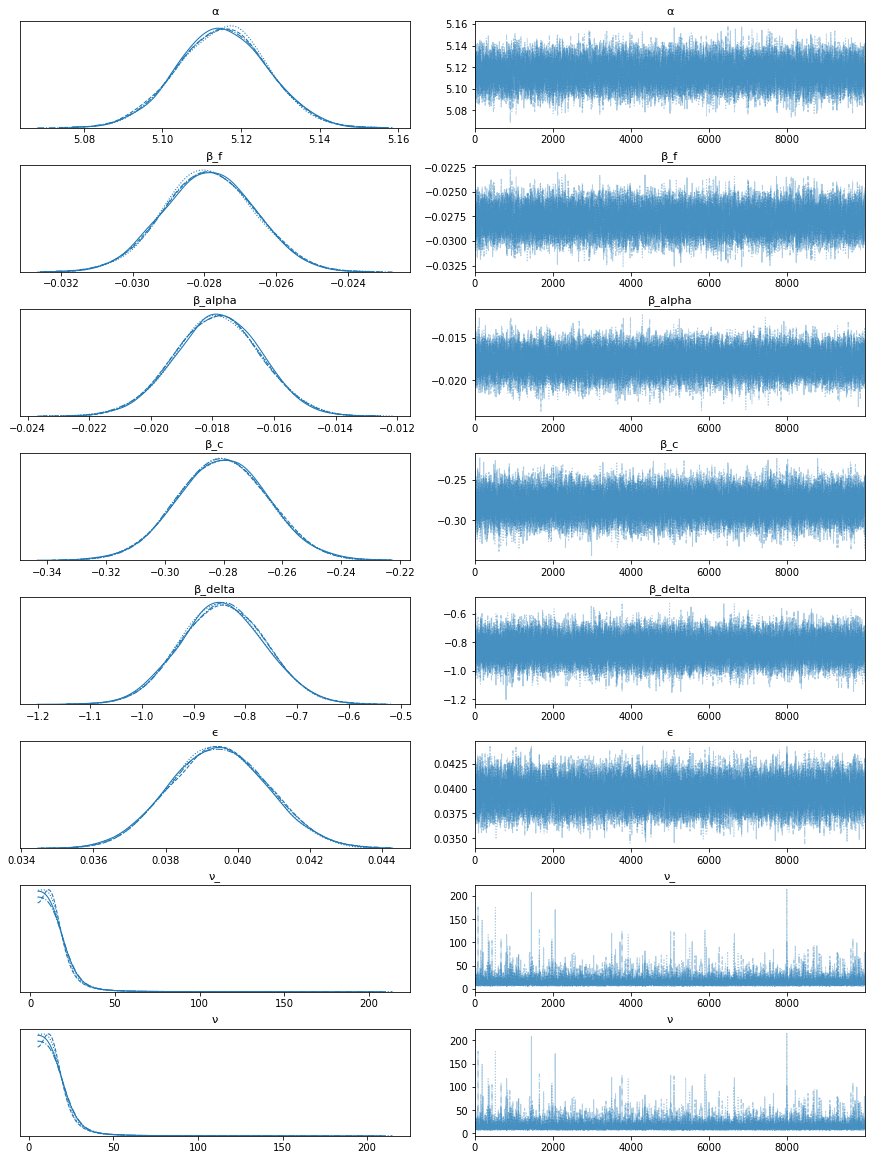

In [40]:
with pm.Model() as model_mlr:

    # Prirors
    α = pm.Normal('α', mu=y.mean(), sd=1) # Try changing the prior distribution

    β_f = pm.Normal('β_f', mu=8, sd=2)
    β_alpha = pm.Normal('β_alpha', mu=2, sd=1)
    β_c = pm.Normal('β_c', mu=0.12, sd=0.1)
    β_delta = pm.Normal('β_delta', mu=0.01, sd=0.1)
   
    μ = α + X_f_v*β_f + X_alpha_v*β_alpha + X_c_v*β_c + X_delta_v*β_delta
   
    ϵ = pm.HalfNormal('ϵ', 5)
    ν_ = pm.Exponential('ν_', 1/29)
    ν = pm.Deterministic('ν', ν_ + 1) # shifting the exponential to avoid values close to 0
    
    # likelihood

    y_pred = pm.StudentT('y_pred', mu=μ, sd=ϵ, nu=ν, observed=yv)

    trace = pm.sample(10000, tune=1000)
    


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_f=trace['β_f'].mean()
beta_alpha=trace['β_alpha'].mean()
beta_c=trace['β_c'].mean()
beta_delta=trace['β_delta'].mean()



# Predicted y oytput
y_p = alpha + beta_f*X_f + beta_alpha*X_alpha + beta_c*X_c + beta_delta*X_delta


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(y, y_p)
print('Mean square error : ',mse)
r2= r2_score(y, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-Robust-Nuts-Full datastet (Specific priors)','sampling/VI_method':'NUTS','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)


In [41]:
model_mlr

## MLR-Robust NUTS on train-test dataset

#### 1)	Generic weakly informative prior: normal(0, 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_, ϵ, β_delta, β_c, β_alpha, β_f, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 243 seconds.
There were 36 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6442679362700217, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


4
1503
Root mean square error :  0.042305902485642914
Mean square error :  0.0017897893851247272
R2-score :  0.4677973707378106
Adjusted R2-score :  0.4663762689240264


mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
α        5.14 0.01    5.12     5.16       0.00     0.00   3931.00 3924.00   
β_f     -0.03 0.00   -0.03    -0.03       0.00     0.00   5091.00 4977.00   
β_alpha -0.01 0.00   -0.01    -0.01       0.00     0.00   5490.00 5258.00   
β_c     -0.29 0.02   -0.32    -0.26       0.00     0.00   4207.00 3871.00   
β_delta -1.95 0.12   -2.18    -1.72       0.00     0.00   5614.00 5540.00   
ϵ        0.04 0.00    0.03     0.04       0.00     0.00   2748.00 2748.00   
ν_       5.62 1.51    3.13     8.29       0.02     0.02   4496.00 4496.00   
ν        6.62 1.51    4.13     9.29       0.02     0.02   4496.00 4496.00   

         ess_bulk  ess_tail  r_hat  
α         3916.00   4055.00   1.00  
β_f       5070.00   7244.00   1.00  
β_alpha   5508.00   5281.00   1.00  
β_c       4416.00   2029.00   1.00  
β_delta   5606.00   6763.00   1.00  
ϵ         2693.00   1334.00   1.00  
ν_        3195.00   2223.00   1.00  
ν         3195.00   2223.00   1.00

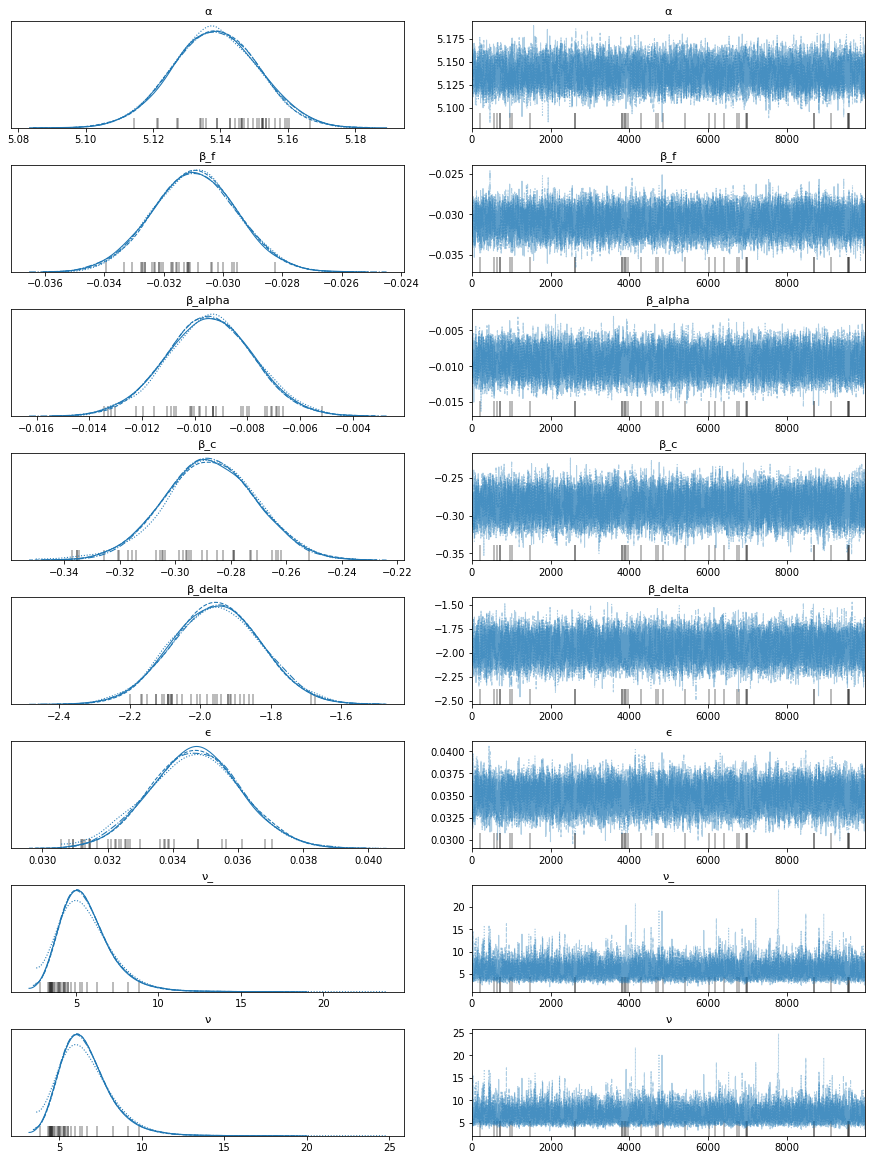

In [42]:
with pm.Model() as model_mlr:

    # Priors
    
    α = pm.Normal('α', mu=y.mean(), sd=1)
    
    β_f = pm.Normal('β_f', mu=0, sd=1)
    β_alpha = pm.Normal('β_alpha', mu=0, sd=1)
    β_c = pm.Normal('β_c', mu=0, sd=1)
    β_delta = pm.Normal('β_delta', mu=0., sd=1)
    
    μ = α + X_f_train_v*β_f + X_alpha_train_v*β_alpha + X_c_train_v*β_c + X_delta_train_v*β_delta
   
    ϵ = pm.HalfNormal('ϵ', 5)
    ν_ = pm.Exponential('ν_', 1/29)
    ν = pm.Deterministic('ν', ν_ + 1) # shifting the exponential to avoid values close to 0
    
    # likelihood

    y_pred = pm.StudentT('y_pred', mu=μ, sd=ϵ, nu=ν, observed=yv_train)

    trace = pm.sample(10000, tune=1000)
    
    
    



## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_f=trace['β_f'].mean()
beta_alpha=trace['β_alpha'].mean()
beta_c=trace['β_c'].mean()
beta_delta=trace['β_delta'].mean()



# Predicted y oytput
y_p = alpha + beta_f*X_f_test + beta_alpha*X_alpha_test+ beta_c*X_c_test+ beta_delta*X_delta_test


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y_test, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(y_test, y_p)
print('Mean square error : ',mse)
r2= r2_score(y_test, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-Robust-Nuts-train/test datastet (general priors',
                                     'sampling/VI_method':'NUTS','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)


In [43]:
model_mlr

#### 2)	Specific informative prior: based on our dataset

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_, ϵ, β_delta, β_c, β_alpha, β_f, α]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 99 seconds.
The acceptance probability does not match the target. It is 0.8967850668176681, but should be close to 0.8. Try to increase the number of tuning steps.


4
1503
Root mean square error :  0.04460204991110135
Mean square error :  0.001989342856272376
R2-score :  0.4084591698825327
Adjusted R2-score :  0.4068796216045154


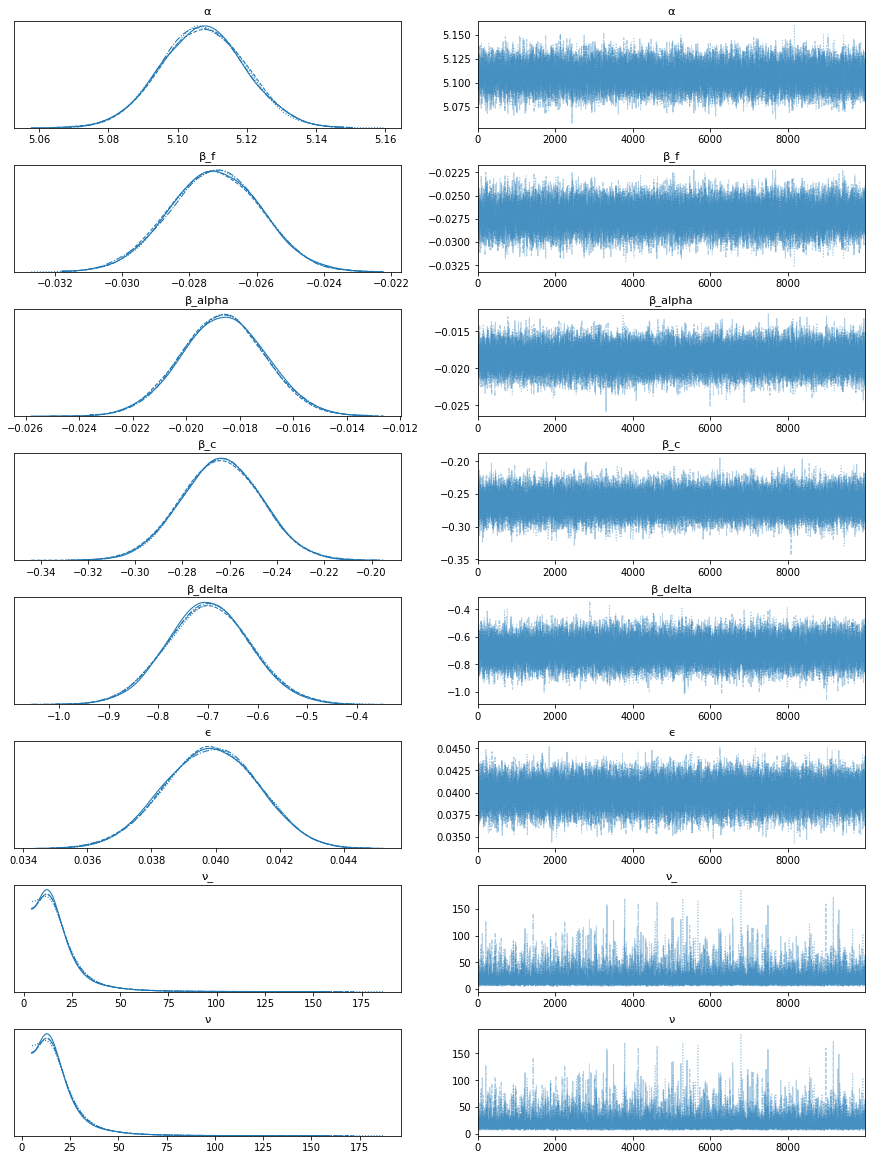

In [44]:
with pm.Model() as model_mlr:
    

    
    # Prirors
    α = pm.Normal('α', mu=y.mean(), sd=1) # Try changing the prior distribution

    β_f = pm.Normal('β_f', mu=8, sd=2)
    β_alpha = pm.Normal('β_alpha', mu=2, sd=1)
    β_c = pm.Normal('β_c', mu=0.12, sd=0.1)
    β_delta = pm.Normal('β_delta', mu=0.01, sd=0.1)
   
    μ = α + X_f_train_v*β_f + X_alpha_train_v*β_alpha + X_c_train_v*β_c + X_delta_train_v*β_delta
   
    ϵ = pm.HalfNormal('ϵ', 5)
    ν_ = pm.Exponential('ν_', 1/29)
    ν = pm.Deterministic('ν', ν_ + 1) # shifting the exponential to avoid values close to 0
    
    # likelihood

    y_pred = pm.StudentT('y_pred', mu=μ, sd=ϵ, nu=ν, observed=yv_train)

    trace = pm.sample(10000, tune=1000)
    


## Finding the paramters from the  drawn samples

alpha=trace['α'].mean()
beta_f=trace['β_f'].mean()
beta_alpha=trace['β_alpha'].mean()
beta_c=trace['β_c'].mean()
beta_delta=trace['β_delta'].mean()



# Predicted y oytput
y_p = alpha + beta_f*X_f_test + beta_alpha*X_alpha_test+ beta_c*X_c_test+ beta_delta*X_delta_test


## Evaluating reults
p= len(X.columns)
print(p)
n= len(X.index)
print(n)

rmse = mean_squared_error(y_test, y_p, squared=False)
print('Root mean square error : ',rmse)
mse = mean_squared_error(y_test, y_p)
print('Mean square error : ',mse)
r2= r2_score(y_test, y_p)
print('R2-score : ',r2)
Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print('Adjusted R2-score : ',Adj_r2)


df_results_r1= df_results_r1.append({'model_name':'MLR-Robust-Nuts-train/test datastet (specific priors',
                                     'sampling/VI_method':'NUTS','RMSE':rmse,'MSE':mse,'R2':r2,
                                  'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

az.summary(trace)

pm.traceplot(trace)
pm.summary(trace)

model_mlr


In [45]:
model_mlr

In [46]:
df_results_r1

model_name sampling/VI_method  \
0   Linear Regression-Full dataste(no log transfor...                 NA   
1                      Linear Regression-Full dataste                 NA   
2                 Linear Regression-tain/test dataste                 NA   
3              MLR-Nuts-Full datastet (general priors               NUTS   
4            MLR-Nuts-Full datastet (Specific priors0               NUTS   
5        MLR-Nuts-train/test datastet (general priors               NUTS   
6       MLR-Nuts-train/test datastet (specific priors               NUTS   
7       MLR-Robust-Nuts-Full datastet (general priors               NUTS   
8     MLR-Robust-Nuts-Full datastet (Specific priors)               NUTS   
9   MLR-Robust-Nuts-train/test datastet (general p...               NUTS   
10  MLR-Robust-Nuts-train/test datastet (specific ...               NUTS   

    RMSE   MSE   R2  Adj_R2                                 model_details  
0   5.04 25.35 0.47    0.47                            LinearRegression()  
1   0.04  0.00 0.44    0.44                            LinearRegression()  
2   0.04  0.00 0.46    0.46                            LinearRegression()  
3   0.04  0.00 0.44    0.44  <pymc3.model.Model object at 0x7f55feb51a50>  
4   0.04  0.00 0.41    0.40  <pymc3.model.Model object at 0x7f55bc5c47d0>  
5   0.04  0.00 0.46    0.46  <pymc3.model.Model object at 0x7f55be6b1690>  
6   0.04  0.00 0.40    0.40  <pymc3.model.Model object at 0x7f55c16ff990>  
7   0.04  0.00 0.42    0.42  <pymc3.model.Model object at 0x7f5601ff0e10>  
8   0.04  0.00 0.41    0.41  <pymc3.model.Model object at 0x7f55c1d60bd0>  
9   0.04  0.00 0.47    0.47  <pymc3.model.Model object at 0x7f55bc6f1110>  
10  0.04  0.00 0.41    0.41  <pymc3.model.Model object at 0x7f5602e06610>

### Chosing the best model hence from above results best results are given by generic prirors with robust MLR on train/test datset we will use this model and prior for our further analysis

## Making a MCMC function for our best models

In [47]:
def model_mcmc(sampling):
    
#     step=sampling

    with pm.Model() as model_mlr:
        
         # Priors
    
        α = pm.Normal('α', mu=y.mean(), sd=1)
        
        β_f = pm.Normal('β_f', mu=0, sd=1)
        β_alpha = pm.Normal('β_alpha', mu=0, sd=1)
        β_c = pm.Normal('β_c', mu=0, sd=1)
        β_delta = pm.Normal('β_delta', mu=0., sd=1)
        
        μ = α + X_f_train_v*β_f + X_alpha_train_v*β_alpha + X_c_train_v*β_c + X_delta_train_v*β_delta
        
        ϵ = pm.HalfNormal('ϵ', 5)
        ν_ = pm.Exponential('ν_', 1/29)
        ν = pm.Deterministic('ν', ν_ + 1) # shifting the exponential to avoid values close to 0
        
        # likelihood

        y_pred = pm.StudentT('y_pred', mu=μ,sd=ϵ, nu=ν, observed=yv_train)
        
        if sampling == 'HMC':
            step = pm.HamiltonianMC()
            
        elif sampling == 'metropolis':
            step = pm.Metropolis()
            
        elif sampling == 'slice':
            step = pm.Slice()
            
        elif sampling == 'NUTS':
            step = pm.NUTS()
        

        trace = pm.sample(2000,step, tune=1000)
     


    ## Finding the paramters from the  drawn samples

    alpha=trace['α'].mean()
    beta_f=trace['β_f'].mean()
    beta_alpha=trace['β_alpha'].mean()
    beta_c=trace['β_c'].mean()
    beta_delta=trace['β_delta'].mean()



    # Predicted y oytput
    y_p = alpha + beta_f*X_f_test + beta_alpha*X_alpha_test+ beta_c*X_c_test+ beta_delta*X_delta_test


    ## Evaluating reults
    p= len(X.columns)
    print(p)
    n= len(X.index)
    print(n)

    rmse = mean_squared_error(y_test, y_p, squared=False)
    print('Root mean seure error : ',rmse)
    mse = mean_squared_error(y_test, y_p)
    print('Mean seure error : ',mse)
    r2= r2_score(y_test, y_p)
    print('R2-score : ',r2)
    Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
    print('Adjusted R2-score : ',Adj_r2)
    
    global df_results_r1


    df_results_r1= df_results_r1.append({'model_name':str(sampling)+' MLR-Robust-Nuts-train/test datastet (G)',
                                        'sampling/VI_method':sampling,'RMSE':rmse,'MSE':mse,'R2':r2,
                                    'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

    az.summary(trace)

    pm.traceplot(trace)
    print(pm.summary(trace))
    return(model_mlr)


## Making a function for Variational Inference

In [48]:
def model_vi(vi_method):
    
    vi=vi_method

    with pm.Model() as model_mlr:
        
        # Priors
    
        α = pm.Normal('α', mu=y.mean(), sd=1)
        
        β_f = pm.Normal('β_f', mu=0, sd=1)
        β_alpha = pm.Normal('β_alpha', mu=0, sd=1)
        β_c = pm.Normal('β_c', mu=0, sd=1)
        β_delta = pm.Normal('β_delta', mu=0., sd=1)
    
        μ = α + X_f_train_v*β_f + X_alpha_train_v*β_alpha + X_c_train_v*β_c + X_delta_train_v*β_delta
    
        ϵ = pm.HalfNormal('ϵ', 5)
        ν_ = pm.Exponential('ν_', 1/29)
        ν = pm.Deterministic('ν', ν_ + 1) # shifting the exponential to avoid values close to 0
        
        # likelihood

        y_pred = pm.StudentT('y_pred', mu=μ, sd=ϵ, nu=ν, observed=yv_train)
        
 
    print('for VI')
    with model_mlr:
        mean_field = pm.fit(method=vi_method) # VI
        

    trace=mean_field.sample(10000)    



    alpha=trace['α'].mean()
    beta_f=trace['β_f'].mean()
    beta_alpha=trace['β_alpha'].mean()
    beta_c=trace['β_c'].mean()
    beta_delta=trace['β_delta'].mean()


    # Predicted y oytput
    y_p = alpha + beta_f*X_f_test + beta_alpha*X_alpha_test+ beta_c*X_c_test+ beta_delta*X_delta_test


    ## Evaluating reults
    p= len(X.columns)
    print(p)
    n= len(X.index)
    print(n)

    rmse = mean_squared_error(y_test, y_p, squared=False)
    print('Root mean seure error : ',rmse)
    mse = mean_squared_error(y_test, y_p)
    print('Mean seure error : ',mse)
    r2= r2_score(y_test, y_p)
    print('R2-score : ',r2)
    Adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
    print('Adjusted R2-score : ',Adj_r2)

    global df_results_r1


    df_results_r1= df_results_r1.append({'model_name':str(vi_method)+' MLR-Robust-Nuts-train/test datastet (G)',
                                        'sampling/VI_method':vi_method,'RMSE':rmse,'MSE':mse,'R2':r2,
                                    'Adj_R2':Adj_r2,'model_details':model_mlr},ignore_index=True)

    az.summary(trace)

    pm.traceplot(trace)
    pm.summary(trace)
    return(model_mlr)


In [49]:
df_results_r1

model_name sampling/VI_method  \
0   Linear Regression-Full dataste(no log transfor...                 NA   
1                      Linear Regression-Full dataste                 NA   
2                 Linear Regression-tain/test dataste                 NA   
3              MLR-Nuts-Full datastet (general priors               NUTS   
4            MLR-Nuts-Full datastet (Specific priors0               NUTS   
5        MLR-Nuts-train/test datastet (general priors               NUTS   
6       MLR-Nuts-train/test datastet (specific priors               NUTS   
7       MLR-Robust-Nuts-Full datastet (general priors               NUTS   
8     MLR-Robust-Nuts-Full datastet (Specific priors)               NUTS   
9   MLR-Robust-Nuts-train/test datastet (general p...               NUTS   
10  MLR-Robust-Nuts-train/test datastet (specific ...               NUTS   

    RMSE   MSE   R2  Adj_R2                                 model_details  
0   5.04 25.35 0.47    0.47                            LinearRegression()  
1   0.04  0.00 0.44    0.44                            LinearRegression()  
2   0.04  0.00 0.46    0.46                            LinearRegression()  
3   0.04  0.00 0.44    0.44  <pymc3.model.Model object at 0x7f55feb51a50>  
4   0.04  0.00 0.41    0.40  <pymc3.model.Model object at 0x7f55bc5c47d0>  
5   0.04  0.00 0.46    0.46  <pymc3.model.Model object at 0x7f55be6b1690>  
6   0.04  0.00 0.40    0.40  <pymc3.model.Model object at 0x7f55c16ff990>  
7   0.04  0.00 0.42    0.42  <pymc3.model.Model object at 0x7f5601ff0e10>  
8   0.04  0.00 0.41    0.41  <pymc3.model.Model object at 0x7f55c1d60bd0>  
9   0.04  0.00 0.47    0.47  <pymc3.model.Model object at 0x7f55bc6f1110>  
10  0.04  0.00 0.41    0.41  <pymc3.model.Model object at 0x7f5602e06610>

# MCMC differnet Sampling Methods

## 1 NUTS

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_, ϵ, β_delta, β_c, β_alpha, β_f, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 28 seconds.


4
1503
Root mean seure error :  0.042306979710286775
Mean seure error :  0.0017898805322066167
R2-score :  0.46777026770712204
Adjusted R2-score :  0.4663490935220943
         mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
α        5.14 0.01    5.12     5.16       0.00     0.00   2590.00 2590.00   
β_f     -0.03 0.00   -0.03    -0.03       0.00     0.00   2799.00 2794.00   
β_alpha -0.01 0.00   -0.01    -0.01       0.00     0.00   4040.00 4040.00   
β_c     -0.29 0.02   -0.32    -0.26       0.00     0.00   4463.00 4450.00   
β_delta -1.95 0.12   -2.19    -1.73       0.00     0.00   4621.00 4603.00   
ϵ        0.04 0.00    0.03     0.04       0.00     0.00   3673.00 3673.00   
ν_       5.62 1.53    3.15     8.32       0.03     0.02   3245.00 3245.00   
ν        6.62 1.53    4.15     9.32       0.03     0.02   3245.00 3245.00   

         ess_bulk  ess_tail  r_hat  
α         2594.00   3548.00   1.00  
β_f       2796.00   3802.00   1.00  
β_alpha   4041.00   5056.00 

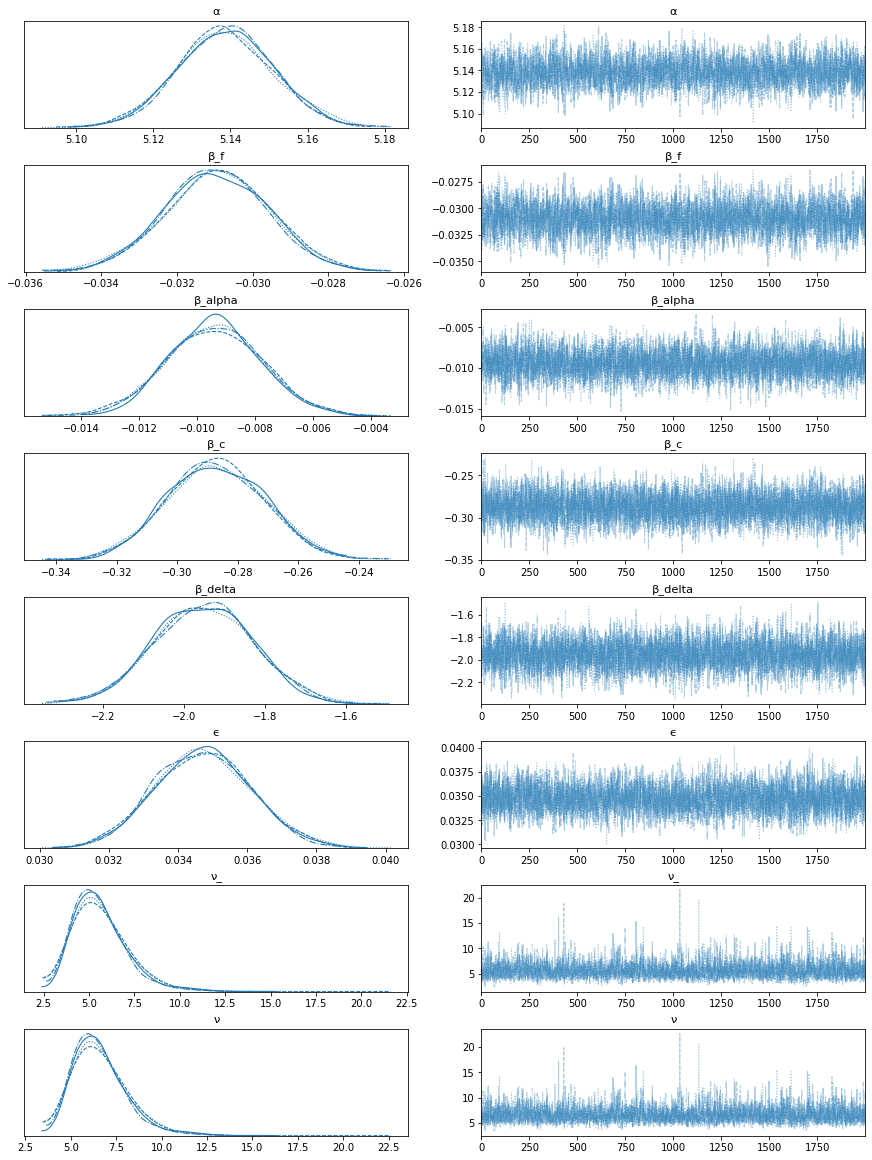

In [50]:
nuts=model_mcmc('NUTS')

In [51]:
model_mlr

In [52]:
df_results_r1

model_name sampling/VI_method  \
0   Linear Regression-Full dataste(no log transfor...                 NA   
1                      Linear Regression-Full dataste                 NA   
2                 Linear Regression-tain/test dataste                 NA   
3              MLR-Nuts-Full datastet (general priors               NUTS   
4            MLR-Nuts-Full datastet (Specific priors0               NUTS   
5        MLR-Nuts-train/test datastet (general priors               NUTS   
6       MLR-Nuts-train/test datastet (specific priors               NUTS   
7       MLR-Robust-Nuts-Full datastet (general priors               NUTS   
8     MLR-Robust-Nuts-Full datastet (Specific priors)               NUTS   
9   MLR-Robust-Nuts-train/test datastet (general p...               NUTS   
10  MLR-Robust-Nuts-train/test datastet (specific ...               NUTS   
11       NUTS MLR-Robust-Nuts-train/test datastet (G)               NUTS   

    RMSE   MSE   R2  Adj_R2                                 model_details  
0   5.04 25.35 0.47    0.47                            LinearRegression()  
1   0.04  0.00 0.44    0.44                            LinearRegression()  
2   0.04  0.00 0.46    0.46                            LinearRegression()  
3   0.04  0.00 0.44    0.44  <pymc3.model.Model object at 0x7f55feb51a50>  
4   0.04  0.00 0.41    0.40  <pymc3.model.Model object at 0x7f55bc5c47d0>  
5   0.04  0.00 0.46    0.46  <pymc3.model.Model object at 0x7f55be6b1690>  
6   0.04  0.00 0.40    0.40  <pymc3.model.Model object at 0x7f55c16ff990>  
7   0.04  0.00 0.42    0.42  <pymc3.model.Model object at 0x7f5601ff0e10>  
8   0.04  0.00 0.41    0.41  <pymc3.model.Model object at 0x7f55c1d60bd0>  
9   0.04  0.00 0.47    0.47  <pymc3.model.Model object at 0x7f55bc6f1110>  
10  0.04  0.00 0.41    0.41  <pymc3.model.Model object at 0x7f5602e06610>  
11  0.04  0.00 0.47    0.47  <pymc3.model.Model object at 0x7f5602407910>

## HMC

Multiprocess sampling (4 chains in 4 jobs)
HamiltonianMC: [ν_, ϵ, β_delta, β_c, β_alpha, β_f, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 39 seconds.
The acceptance probability does not match the target. It is 0.7494593696075333, but should be close to 0.65. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7707932393754242, but should be close to 0.65. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8072884774274246, but should be close to 0.65. Try to increase the number of tuning steps.


4
1503
Root mean seure error :  0.04230664984697223
Mean seure error :  0.0017898526212743156
R2-score :  0.46777856715938115
Adjusted R2-score :  0.46635741513577467
         mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
α        5.14 0.01    5.12     5.16       0.00     0.00   2125.00 2125.00   
β_f     -0.03 0.00   -0.03    -0.03       0.00     0.00   2357.00 2357.00   
β_alpha -0.01 0.00   -0.01    -0.01       0.00     0.00   4294.00 4294.00   
β_c     -0.29 0.02   -0.32    -0.26       0.00     0.00   4210.00 4202.00   
β_delta -1.95 0.12   -2.19    -1.72       0.00     0.00   4599.00 4599.00   
ϵ        0.04 0.00    0.03     0.04       0.00     0.00   2485.00 2479.00   
ν_       5.67 1.61    3.19     8.41       0.04     0.03   2171.00 2089.00   
ν        6.67 1.61    4.19     9.41       0.04     0.03   2171.00 2089.00   

         ess_bulk  ess_tail  r_hat  
α         2128.00   3395.00   1.00  
β_f       2357.00   3302.00   1.00  
β_alpha   4292.00   5026.00 

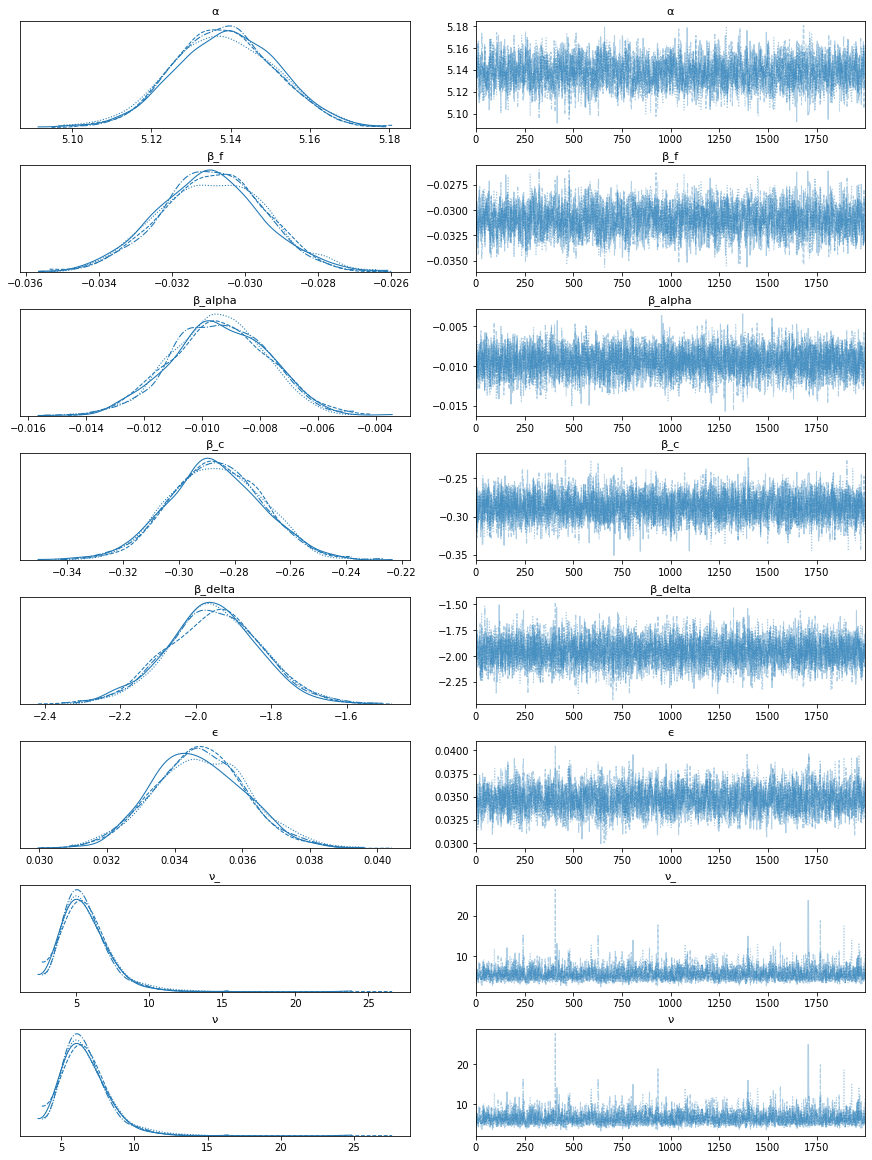

In [53]:
hmc=model_mcmc('HMC')

In [54]:
model_mlr

## Metrolpis

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [ν_]
>Metropolis: [ϵ]
>Metropolis: [β_delta]
>Metropolis: [β_c]
>Metropolis: [β_alpha]
>Metropolis: [β_f]
>Metropolis: [α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 6 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


4
1503
Root mean seure error :  0.042938840398695284
Mean seure error :  0.0018437440147846262
R2-score :  0.45175369766402884
Adjusted R2-score :  0.45028975560171647
         mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
α        5.06  0.04    5.00     5.13       0.02     0.01      5.00    5.00   
β_f     -0.02  0.01   -0.03    -0.01       0.00     0.00      5.00    5.00   
β_alpha -0.01  0.00   -0.01    -0.00       0.00     0.00     11.00   11.00   
β_c     -0.24  0.03   -0.29    -0.20       0.01     0.01      9.00    8.00   
β_delta -1.81  0.15   -2.09    -1.52       0.04     0.03     12.00   12.00   
ϵ        0.04  0.00    0.03     0.04       0.00     0.00      6.00    6.00   
ν_      22.42 23.27    4.15    65.34       7.39     5.38     10.00   10.00   
ν       23.42 23.27    5.15    66.34       7.39     5.38     10.00   10.00   

         ess_bulk  ess_tail  r_hat  
α            5.00     11.00   2.38  
β_f          5.00     10.00   2.44  
β_alpha     11.00 

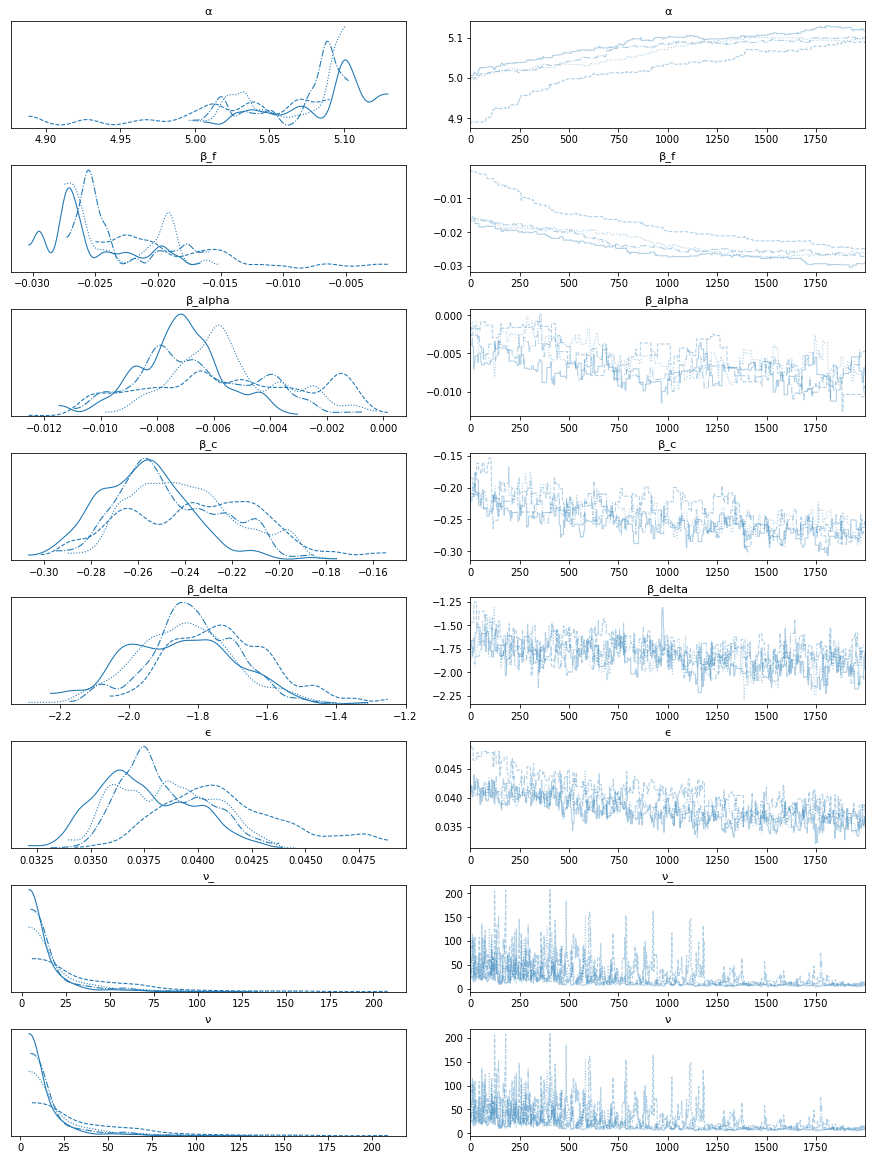

In [55]:
metrolpis=model_mcmc('metropolis')

In [56]:
model_mlr

In [57]:
df_results_r1

model_name sampling/VI_method  \
0   Linear Regression-Full dataste(no log transfor...                 NA   
1                      Linear Regression-Full dataste                 NA   
2                 Linear Regression-tain/test dataste                 NA   
3              MLR-Nuts-Full datastet (general priors               NUTS   
4            MLR-Nuts-Full datastet (Specific priors0               NUTS   
5        MLR-Nuts-train/test datastet (general priors               NUTS   
6       MLR-Nuts-train/test datastet (specific priors               NUTS   
7       MLR-Robust-Nuts-Full datastet (general priors               NUTS   
8     MLR-Robust-Nuts-Full datastet (Specific priors)               NUTS   
9   MLR-Robust-Nuts-train/test datastet (general p...               NUTS   
10  MLR-Robust-Nuts-train/test datastet (specific ...               NUTS   
11       NUTS MLR-Robust-Nuts-train/test datastet (G)               NUTS   
12        HMC MLR-Robust-Nuts-train/test datastet (G)                HMC   
13  metropolis MLR-Robust-Nuts-train/test datastet...         metropolis   

    RMSE   MSE   R2  Adj_R2                                 model_details  
0   5.04 25.35 0.47    0.47                            LinearRegression()  
1   0.04  0.00 0.44    0.44                            LinearRegression()  
2   0.04  0.00 0.46    0.46                            LinearRegression()  
3   0.04  0.00 0.44    0.44  <pymc3.model.Model object at 0x7f55feb51a50>  
4   0.04  0.00 0.41    0.40  <pymc3.model.Model object at 0x7f55bc5c47d0>  
5   0.04  0.00 0.46    0.46  <pymc3.model.Model object at 0x7f55be6b1690>  
6   0.04  0.00 0.40    0.40  <pymc3.model.Model object at 0x7f55c16ff990>  
7   0.04  0.00 0.42    0.42  <pymc3.model.Model object at 0x7f5601ff0e10>  
8   0.04  0.00 0.41    0.41  <pymc3.model.Model object at 0x7f55c1d60bd0>  
9   0.04  0.00 0.47    0.47  <pymc3.model.Model object at 0x7f55bc6f1110>  
10  0.04  0.00 0.41    0.41  <pymc3.model.Model object at 0x7f5602e06610>  
11  0.04  0.00 0.47    0.47  <pymc3.model.Model object at 0x7f5602407910>  
12  0.04  0.00 0.47    0.47  <pymc3.model.Model object at 0x7f560212b890>  
13  0.04  0.00 0.45    0.45  <pymc3.model.Model object at 0x7f55b4143b90>

## Slice

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [ν_]
>Slice: [ϵ]
>Slice: [β_delta]
>Slice: [β_c]
>Slice: [β_alpha]
>Slice: [β_f]
>Slice: [α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 20 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


4
1503
Root mean seure error :  0.042301760349443926
Mean seure error :  0.0017894389286617865
R2-score :  0.46790158068148835
Adjusted R2-score :  0.4664807571319062
         mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
α        5.14 0.01    5.11     5.16       0.00     0.00     12.00   12.00   
β_f     -0.03 0.00   -0.03    -0.03       0.00     0.00     13.00   13.00   
β_alpha -0.01 0.00   -0.01    -0.01       0.00     0.00    229.00  229.00   
β_c     -0.29 0.02   -0.32    -0.25       0.00     0.00     58.00   57.00   
β_delta -1.95 0.12   -2.17    -1.71       0.00     0.00    821.00  782.00   
ϵ        0.04 0.00    0.03     0.04       0.00     0.00     57.00   57.00   
ν_       5.65 1.54    3.14     8.38       0.21     0.15     53.00   53.00   
ν        6.65 1.54    4.14     9.38       0.21     0.15     53.00   53.00   

         ess_bulk  ess_tail  r_hat  
α           12.00    101.00   1.26  
β_f         13.00     89.00   1.24  
β_alpha    226.00    827.00 

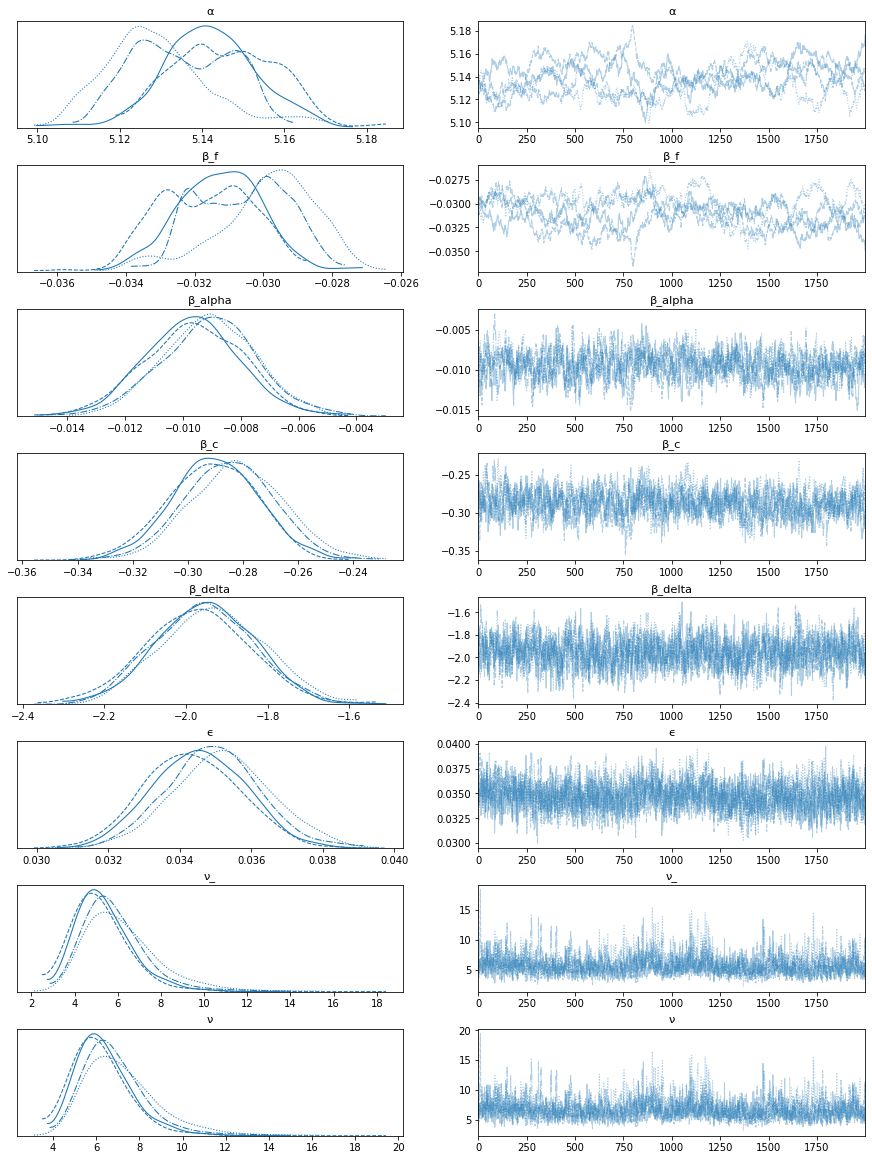

In [58]:
slice= model_mcmc('slice')

# Variational Inference Methods

## ADVI

for VI


Finished [100%]: Average Loss = 2,254.8


4
1503
Root mean seure error :  0.06617046433671607
Mean seure error :  0.004378530350536614
R2-score :  -0.3019774193696483
Adjusted R2-score :  -0.30545399458825884


arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

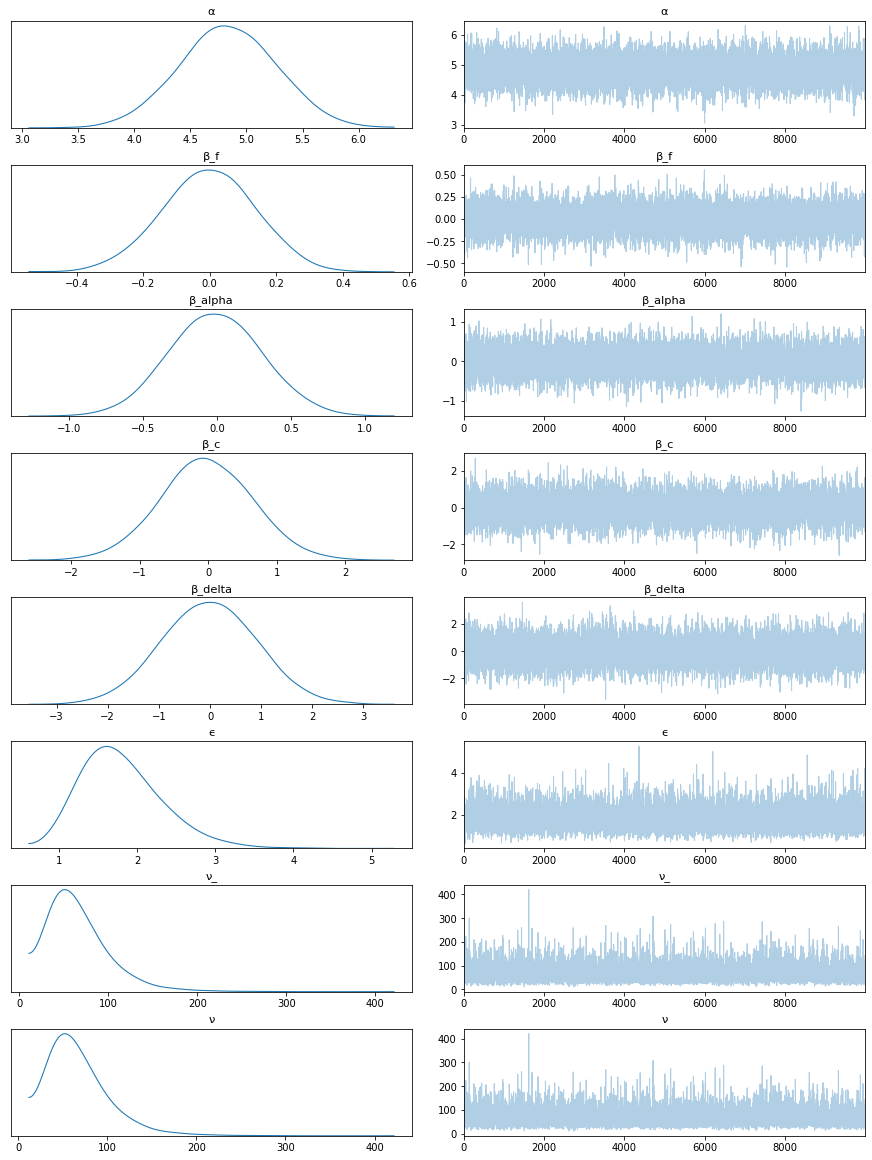

In [59]:
advi=model_vi('advi')

## fullrank advi

for VI


Finished [100%]: Average Loss = 710.9


4
1503
Root mean seure error :  0.054105978238790625
Mean seure error :  0.002927456881176485
R2-score :  0.12950637535195808
Adjusted R2-score :  0.12718195979882574


arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

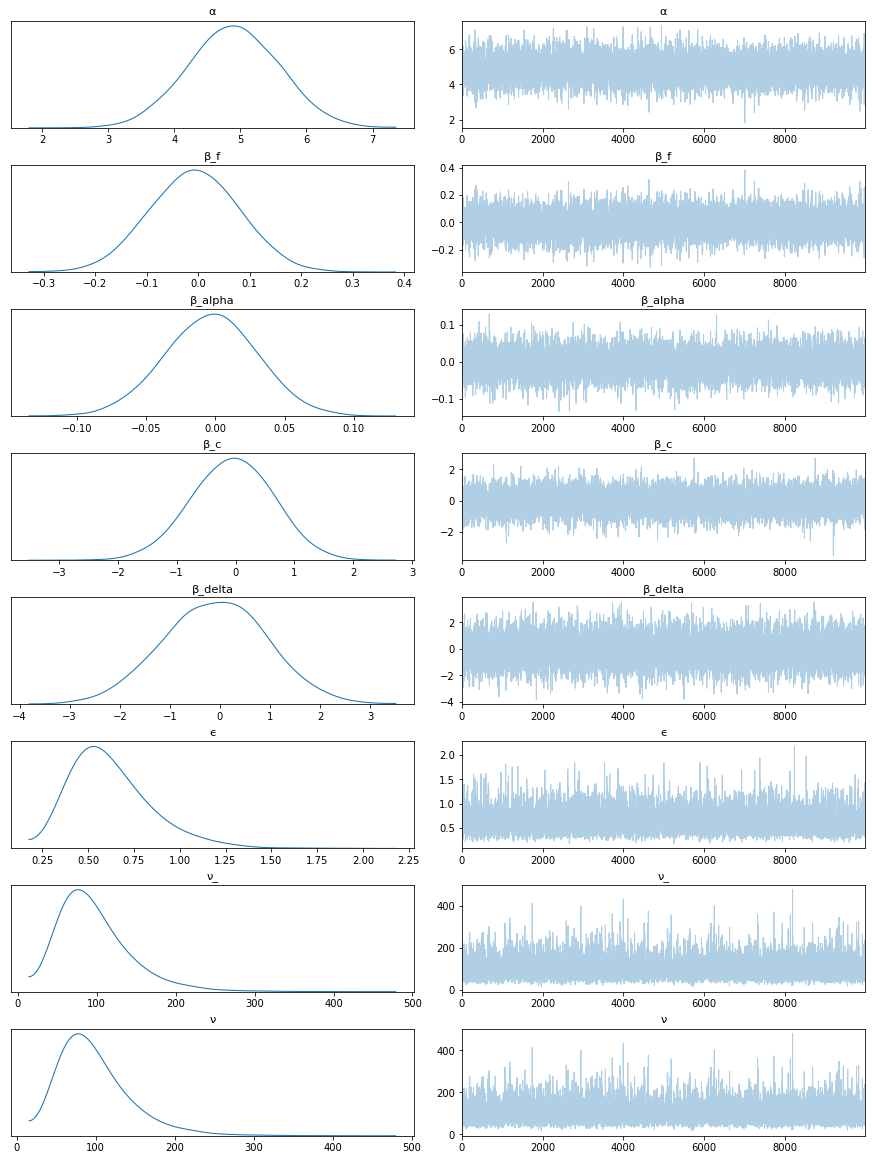

In [60]:
fr_advi=model_vi('fullrank_advi')

## svgd

for VI


4
1503
Root mean seure error :  0.047899362028812294
Mean seure error :  0.002294348882767225
R2-score :  0.3177641358240648
Adjusted R2-score :  0.3159424112201237


arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

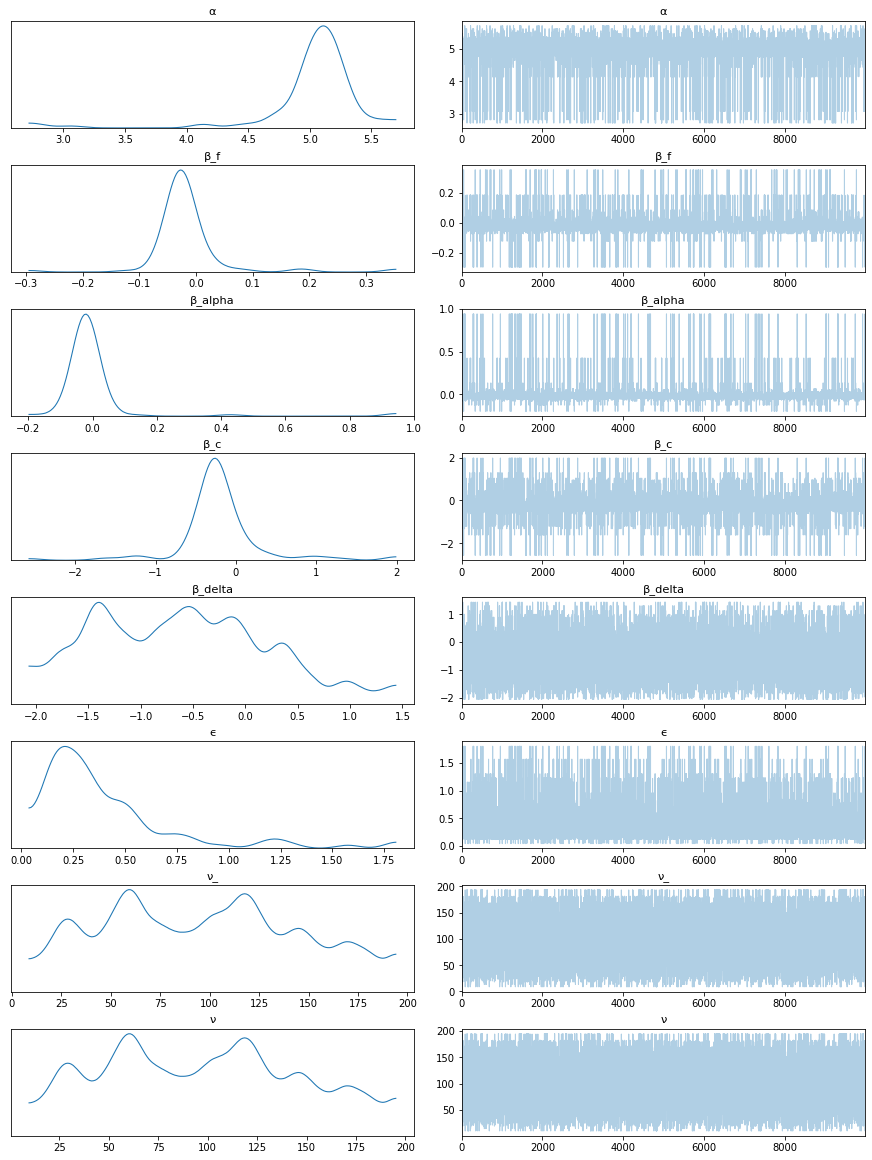

In [61]:
svgd= model_vi('svgd')

In [62]:
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', 500)

In [63]:
df_results_r1

model_name sampling/VI_method  \
0   Linear Regression-Full dataste(no log transformation)                 NA   
1                          Linear Regression-Full dataste                 NA   
2                     Linear Regression-tain/test dataste                 NA   
3                  MLR-Nuts-Full datastet (general priors               NUTS   
4                MLR-Nuts-Full datastet (Specific priors0               NUTS   
5            MLR-Nuts-train/test datastet (general priors               NUTS   
6           MLR-Nuts-train/test datastet (specific priors               NUTS   
7           MLR-Robust-Nuts-Full datastet (general priors               NUTS   
8         MLR-Robust-Nuts-Full datastet (Specific priors)               NUTS   
9     MLR-Robust-Nuts-train/test datastet (general priors               NUTS   
10   MLR-Robust-Nuts-train/test datastet (specific priors               NUTS   
11           NUTS MLR-Robust-Nuts-train/test datastet (G)               NUTS   
12            HMC MLR-Robust-Nuts-train/test datastet (G)                HMC   
13     metropolis MLR-Robust-Nuts-train/test datastet (G)         metropolis   
14          slice MLR-Robust-Nuts-train/test datastet (G)              slice   
15           advi MLR-Robust-Nuts-train/test datastet (G)               advi   
16  fullrank_advi MLR-Robust-Nuts-train/test datastet (G)      fullrank_advi   
17           svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   

    RMSE   MSE    R2  Adj_R2                                 model_details  
0   5.04 25.35  0.47    0.47                            LinearRegression()  
1   0.04  0.00  0.44    0.44                            LinearRegression()  
2   0.04  0.00  0.46    0.46                            LinearRegression()  
3   0.04  0.00  0.44    0.44  <pymc3.model.Model object at 0x7f55feb51a50>  
4   0.04  0.00  0.41    0.40  <pymc3.model.Model object at 0x7f55bc5c47d0>  
5   0.04  0.00  0.46    0.46  <pymc3.model.Model object at 0x7f55be6b1690>  
6   0.04  0.00  0.40    0.40  <pymc3.model.Model object at 0x7f55c16ff990>  
7   0.04  0.00  0.42    0.42  <pymc3.model.Model object at 0x7f5601ff0e10>  
8   0.04  0.00  0.41    0.41  <pymc3.model.Model object at 0x7f55c1d60bd0>  
9   0.04  0.00  0.47    0.47  <pymc3.model.Model object at 0x7f55bc6f1110>  
10  0.04  0.00  0.41    0.41  <pymc3.model.Model object at 0x7f5602e06610>  
11  0.04  0.00  0.47    0.47  <pymc3.model.Model object at 0x7f5602407910>  
12  0.04  0.00  0.47    0.47  <pymc3.model.Model object at 0x7f560212b890>  
13  0.04  0.00  0.45    0.45  <pymc3.model.Model object at 0x7f55b4143b90>  
14  0.04  0.00  0.47    0.47  <pymc3.model.Model object at 0x7f55bca85d50>  
15  0.07  0.00 -0.30   -0.31  <pymc3.model.Model object at 0x7f55bcff2d50>  
16  0.05  0.00  0.13    0.13  <pymc3.model.Model object at 0x7f55f48edb50>  
17  0.05  0.00  0.32    0.32  <pymc3.model.Model object at 0x7f55be1e51d0>

In [68]:
df_results_r1

model_name sampling/VI_method  \
0   Linear Regression-Full dataste(no log transformation)                 NA   
1                          Linear Regression-Full dataste                 NA   
2                     Linear Regression-tain/test dataste                 NA   
3                  MLR-Nuts-Full datastet (general priors               NUTS   
4                MLR-Nuts-Full datastet (Specific priors0               NUTS   
5            MLR-Nuts-train/test datastet (general priors               NUTS   
6           MLR-Nuts-train/test datastet (specific priors               NUTS   
7           MLR-Robust-Nuts-Full datastet (general priors               NUTS   
8         MLR-Robust-Nuts-Full datastet (Specific priors)               NUTS   
9     MLR-Robust-Nuts-train/test datastet (general priors               NUTS   
10   MLR-Robust-Nuts-train/test datastet (specific priors               NUTS   
11           NUTS MLR-Robust-Nuts-train/test datastet (G)               NUTS   
12            HMC MLR-Robust-Nuts-train/test datastet (G)                HMC   
13     metropolis MLR-Robust-Nuts-train/test datastet (G)         metropolis   
14          slice MLR-Robust-Nuts-train/test datastet (G)              slice   
15           advi MLR-Robust-Nuts-train/test datastet (G)               advi   
16  fullrank_advi MLR-Robust-Nuts-train/test datastet (G)      fullrank_advi   
17           svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   
18          asvgd MLR-Robust-Nuts-train/test datastet (G)              asvgd   

    RMSE   MSE    R2  Adj_R2                                 model_details  
0   5.04 25.35  0.47    0.47                            LinearRegression()  
1   0.04  0.00  0.44    0.44                            LinearRegression()  
2   0.04  0.00  0.46    0.46                            LinearRegression()  
3   0.04  0.00  0.44    0.44  <pymc3.model.Model object at 0x7f55feb51a50>  
4   0.04  0.00  0.41    0.40  <pymc3.model.Model object at 0x7f55bc5c47d0>  
5   0.04  0.00  0.46    0.46  <pymc3.model.Model object at 0x7f55be6b1690>  
6   0.04  0.00  0.40    0.40  <pymc3.model.Model object at 0x7f55c16ff990>  
7   0.04  0.00  0.42    0.42  <pymc3.model.Model object at 0x7f5601ff0e10>  
8   0.04  0.00  0.41    0.41  <pymc3.model.Model object at 0x7f55c1d60bd0>  
9   0.04  0.00  0.47    0.47  <pymc3.model.Model object at 0x7f55bc6f1110>  
10  0.04  0.00  0.41    0.41  <pymc3.model.Model object at 0x7f5602e06610>  
11  0.04  0.00  0.47    0.47  <pymc3.model.Model object at 0x7f5602407910>  
12  0.04  0.00  0.47    0.47  <pymc3.model.Model object at 0x7f560212b890>  
13  0.04  0.00  0.45    0.45  <pymc3.model.Model object at 0x7f55b4143b90>  
14  0.04  0.00  0.47    0.47  <pymc3.model.Model object at 0x7f55bca85d50>  
15  0.07  0.00 -0.30   -0.31  <pymc3.model.Model object at 0x7f55bcff2d50>  
16  0.05  0.00  0.13    0.13  <pymc3.model.Model object at 0x7f55f48edb50>  
17  0.05  0.00  0.32    0.32  <pymc3.model.Model object at 0x7f55be1e51d0>  
18  0.06  0.00 -0.01   -0.01  <pymc3.model.Model object at 0x7f55b63acbd0>

In [69]:
df_reults_r1=df_results_r1.sort_values('Adj_R2',ascending=False)

df_reults_r1

model_name sampling/VI_method  \
14          slice MLR-Robust-Nuts-train/test datastet (G)              slice   
9     MLR-Robust-Nuts-train/test datastet (general priors               NUTS   
12            HMC MLR-Robust-Nuts-train/test datastet (G)                HMC   
11           NUTS MLR-Robust-Nuts-train/test datastet (G)               NUTS   
0   Linear Regression-Full dataste(no log transformation)                 NA   
2                     Linear Regression-tain/test dataste                 NA   
5            MLR-Nuts-train/test datastet (general priors               NUTS   
13     metropolis MLR-Robust-Nuts-train/test datastet (G)         metropolis   
1                          Linear Regression-Full dataste                 NA   
3                  MLR-Nuts-Full datastet (general priors               NUTS   
7           MLR-Robust-Nuts-Full datastet (general priors               NUTS   
10   MLR-Robust-Nuts-train/test datastet (specific priors               NUTS   
8         MLR-Robust-Nuts-Full datastet (Specific priors)               NUTS   
4                MLR-Nuts-Full datastet (Specific priors0               NUTS   
6           MLR-Nuts-train/test datastet (specific priors               NUTS   
17           svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   
16  fullrank_advi MLR-Robust-Nuts-train/test datastet (G)      fullrank_advi   
18          asvgd MLR-Robust-Nuts-train/test datastet (G)              asvgd   
15           advi MLR-Robust-Nuts-train/test datastet (G)               advi   

    RMSE   MSE    R2  Adj_R2                                 model_details  
14  0.04  0.00  0.47    0.47  <pymc3.model.Model object at 0x7f55bca85d50>  
9   0.04  0.00  0.47    0.47  <pymc3.model.Model object at 0x7f55bc6f1110>  
12  0.04  0.00  0.47    0.47  <pymc3.model.Model object at 0x7f560212b890>  
11  0.04  0.00  0.47    0.47  <pymc3.model.Model object at 0x7f5602407910>  
0   5.04 25.35  0.47    0.47                            LinearRegression()  
2   0.04  0.00  0.46    0.46                            LinearRegression()  
5   0.04  0.00  0.46    0.46  <pymc3.model.Model object at 0x7f55be6b1690>  
13  0.04  0.00  0.45    0.45  <pymc3.model.Model object at 0x7f55b4143b90>  
1   0.04  0.00  0.44    0.44                            LinearRegression()  
3   0.04  0.00  0.44    0.44  <pymc3.model.Model object at 0x7f55feb51a50>  
7   0.04  0.00  0.42    0.42  <pymc3.model.Model object at 0x7f5601ff0e10>  
10  0.04  0.00  0.41    0.41  <pymc3.model.Model object at 0x7f5602e06610>  
8   0.04  0.00  0.41    0.41  <pymc3.model.Model object at 0x7f55c1d60bd0>  
4   0.04  0.00  0.41    0.40  <pymc3.model.Model object at 0x7f55bc5c47d0>  
6   0.04  0.00  0.40    0.40  <pymc3.model.Model object at 0x7f55c16ff990>  
17  0.05  0.00  0.32    0.32  <pymc3.model.Model object at 0x7f55be1e51d0>  
16  0.05  0.00  0.13    0.13  <pymc3.model.Model object at 0x7f55f48edb50>  
18  0.06  0.00 -0.01   -0.01  <pymc3.model.Model object at 0x7f55b63acbd0>  
15  0.07  0.00 -0.30   -0.31  <pymc3.model.Model object at 0x7f55bcff2d50>

In [71]:
# save the final data
df_results_r1.to_csv('df_results_r1-f.csv',index=False)

## Conclusion

#### We can see that MCMC models have performed better than VI models
#### Also we see the performance of MCMC is at par and a bit better than normal Linear Regression
#### Slice Sampling method gave best result in MCMC model